In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get stock data
tickers = ["AAPL","MTB","NVDA","TSLA","META","MSFT","HD","NFLX", "CSCO", "SPY", "VOO", "UVIX", "PATH","NLR", "OKLO"]
data = yf.download(tickers, start='2022-01-01', end='2025-10-4', auto_adjust=True)

# Access 'Adj Close' prices for all tickers
prices = data['Close']

# Calculate daily returns
returns = prices.pct_change()

[*********************100%***********************]  15 of 15 completed


In [ ]:
# Basic exploration
data.describe()  # Statistical summary


Price        Close                                                  \
Ticker        AAPL        CSCO          HD        META        MSFT   
count   942.000000  942.000000  942.000000  942.000000  942.000000   
mean    184.940511   50.030324  325.281230  386.774402  353.068985   
std      32.624517    7.984468   46.686211  199.565499   83.626462   
min     123.161964   35.973248  247.106415   88.365257  208.659088   
25%     160.263897   44.821767  282.313316  201.433220  276.055634   
50%     180.021469   47.697412  319.951691  330.015564  359.237701   
75%     212.640015   54.694207  361.743988  560.891373  416.258339   
max     257.853760   71.359116  423.599152  789.467163  533.761902   

Price                                                               ...  \
Ticker         MTB        NFLX         NLR        NVDA        OKLO  ...   
count   942.000000  942.000000  942.000000  942.000000  942.000000  ...   
mean    152.223361   58.066662   70.372845   72.266895   19.016676  ...   
std      27.408653   31.711308   20.440623   53.276361   20.702916  ...   
min     102.134872   16.636999   46.342552   11.213528    5.590000  ...   
25%     130.847244   33.553750   52.390620   23.211555    9.750000  ...   
50%     150.034302   47.401499   68.663136   47.589138   10.320000  ...   
75%     170.779392   75.464752   82.029947  121.592318   18.352500  ...   
max     215.798492  133.912994  141.889999  188.889999  142.649994  ...   

Price         Volume                                                          \
Ticker           MTB          NFLX           NLR          NVDA          OKLO   
count   9.420000e+02  9.420000e+02  9.420000e+02  9.420000e+02  9.420000e+02   
mean    1.243778e+06  6.348829e+07  1.109452e+05  4.178239e+08  5.545014e+06   
std     7.899344e+05  6.872823e+07  1.842632e+05  1.815491e+08  1.002501e+07   
min     2.778000e+05  1.354200e+07  7.000000e+02  1.051570e+08  0.000000e+00   
25%     8.275750e+05  3.125175e+07  5.600000e+03  2.771996e+08  2.462500e+04   
50%     1.056050e+06  4.553800e+07  2.755000e+04  4.101195e+08  3.321500e+05   
75%     1.385850e+06  7.246575e+07  1.185500e+05  5.234567e+08  7.793725e+06   
max     9.479700e+06  1.333875e+09  1.238400e+06  1.543911e+09  9.250310e+07   

Price                                                                         
Ticker          PATH           SPY          TSLA          UVIX           VOO  
count   9.420000e+02  9.420000e+02  9.420000e+02  8.820000e+02  9.420000e+02  
mean    8.992599e+06  7.637326e+07  1.056841e+08  2.918970e+06  5.545675e+06  
std     7.166558e+06  2.988099e+07  3.902706e+07  5.732207e+06  3.389669e+06  
min     2.180200e+06  2.604870e+07  3.716760e+07  4.690000e+02  1.351300e+06  
25%     5.236150e+06  5.811958e+07  7.749008e+07  2.683600e+04  3.652100e+06  
50%     7.044400e+06  7.225170e+07  9.810760e+07  3.619550e+05  4.745250e+06  
75%     1.021872e+07  8.949765e+07  1.250760e+08  2.546272e+06  6.285175e+06  
max     8.651220e+07  2.566114e+08  3.065906e+08  4.562040e+07  3.541800e+07  

[8 rows x 75 columns]

In [ ]:
data.head()

Price            Close                                                 \
Ticker            AAPL       CSCO          HD        META        MSFT   
Date                                                                    
2022-01-03  178.270325  56.096855  371.728394  336.465820  323.898346   
2022-01-04  176.007797  54.721008  375.548981  334.468109  318.344482   
2022-01-05  171.325958  53.854408  370.454865  322.183868  306.123840   
2022-01-06  168.466003  54.426186  369.108490  330.423035  303.704926   
2022-01-07  168.632477  54.613804  358.056000  329.757172  303.859711   

Price                                                          ...   Volume  \
Ticker             MTB       NFLX        NLR       NVDA  OKLO  ...      MTB   
Date                                                           ...            
2022-01-03  140.201492  59.737000  51.251049  30.064440  9.86  ...  1049800   
2022-01-04  145.295685  59.115002  51.595016  29.235003  9.85  ...  1325800   
2022-01-05  146.438568  56.751999  51.306828  27.552164  9.90  ...  1396800   
2022-01-06  152.321259  55.328999  50.628189  28.125086  9.88  ...  1675000   
2022-01-07  156.751022  54.105999  51.223160  27.195837  9.88  ...  1698100   

Price                                                                        \
Ticker          NFLX   NLR       NVDA   OKLO     PATH        SPY       TSLA   
Date                                                                          
2022-01-03  30675000  3100  391547000   8800  3572100   72668200  103931400   
2022-01-04  43931000  7700  527154000   1200  3250400   71178700  100248300   
2022-01-05  41487000  9600  498064000  20800  4479500  104538900   80119800   
2022-01-06  57118000  8800  454186000    600  4797400   86858900   90336600   
2022-01-07  33829000  5400  409939000  16900  3688300   85111600   84164700   

Price                     
Ticker     UVIX      VOO  
Date                      
2022-01-03  NaN  6017300  
2022-01-04  NaN  6262200  
2022-01-05  NaN  7539600  
2022-01-06  NaN  7971500  
2022-01-07  NaN  6157500  

[5 rows x 75 columns]

In [ ]:
correlation_matrix = data['Close'].corr()  # How stocks move together


##Heatmap for visualizing the corrolation matrix

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

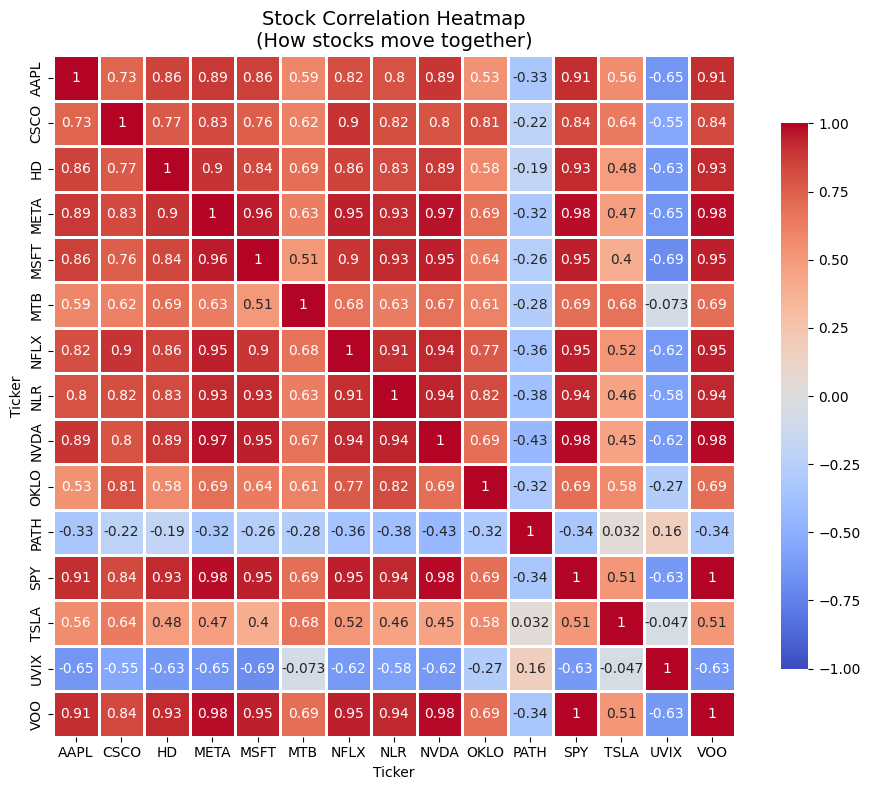

Correlation Interpretation:
0.7-1.0: Strong positive (move together)
0.3-0.7: Moderate positive
-0.3-0.3: Little to no relationship
< -0.3: Negative (move opposite)


In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,  # Show numbers in squares
            cmap='coolwarm',  # Red for high, blue for low
            center=0,  # Center colormap at 0
            vmin=-1, vmax=1,  # Correlation ranges from -1 to 1
            square=True,  # Make it square shaped
            linewidths=1,  # Add gridlines
            cbar_kws={"shrink": 0.8})  # Make colorbar smaller

plt.title('Stock Correlation Heatmap\n(How stocks move together)', fontsize=14)
plt.tight_layout()
plt.show()
# Interpretation helper
print("Correlation Interpretation:")
print("0.7-1.0: Strong positive (move together)")
print("0.3-0.7: Moderate positive")
print("-0.3-0.3: Little to no relationship")
print("< -0.3: Negative (move opposite)")

##Daily returns

In [ ]:
# Method 1: Using pct_change() - EASIEST
daily_returns = prices.pct_change()

# Method 2: Manual calculation (same result)
daily_returns_manual = (prices - prices.shift(1)) / prices.shift(1)

# Method 3: Using log returns (more mathematically correct)
log_returns = np.log(prices / prices.shift(1))

# Remove the first row (it's NaN because there's no previous day)
daily_returns = daily_returns.dropna()

print("\nDaily returns shape:", daily_returns.shape)
print("last few returns:\n", daily_returns.tail())
print("\nExample: AAPL return on second day:", daily_returns['AAPL'].iloc[0])


Daily returns shape: (881, 15)
last few returns:
 Ticker          AAPL      CSCO        HD      META      MSFT       MTB  \
Date                                                                     
2025-09-29 -0.004032  0.007438 -0.008023 -0.000471  0.006139 -0.009194   
2025-09-30  0.000786  0.010337 -0.003958 -0.012133  0.006510 -0.003429   
2025-10-01  0.003220  0.004823 -0.020163 -0.023203  0.003398 -0.011790   
2025-10-02  0.006577 -0.006400 -0.005063  0.013536 -0.007639  0.001741   
2025-10-03  0.003461  0.000295  0.000127 -0.022681  0.003122 -0.005470   

Ticker          NFLX       NLR      NVDA      OKLO      PATH       SPY  \
Date                                                                     
2025-09-29 -0.003469  0.003890  0.020540  0.054103  0.028665  0.002810   
2025-09-30 -0.006209 -0.008116  0.026010 -0.041885  0.065287  0.003767   
2025-10-01 -0.023371  0.013712  0.003537  0.038520 -0.029148  0.003408   
2025-10-02 -0.007148  0.031852  0.008812  0.111015 -0.018476

##Return Density Plot
###Look at skews
###Peak is average likelyhood of return
###Outliers/spread show volitility

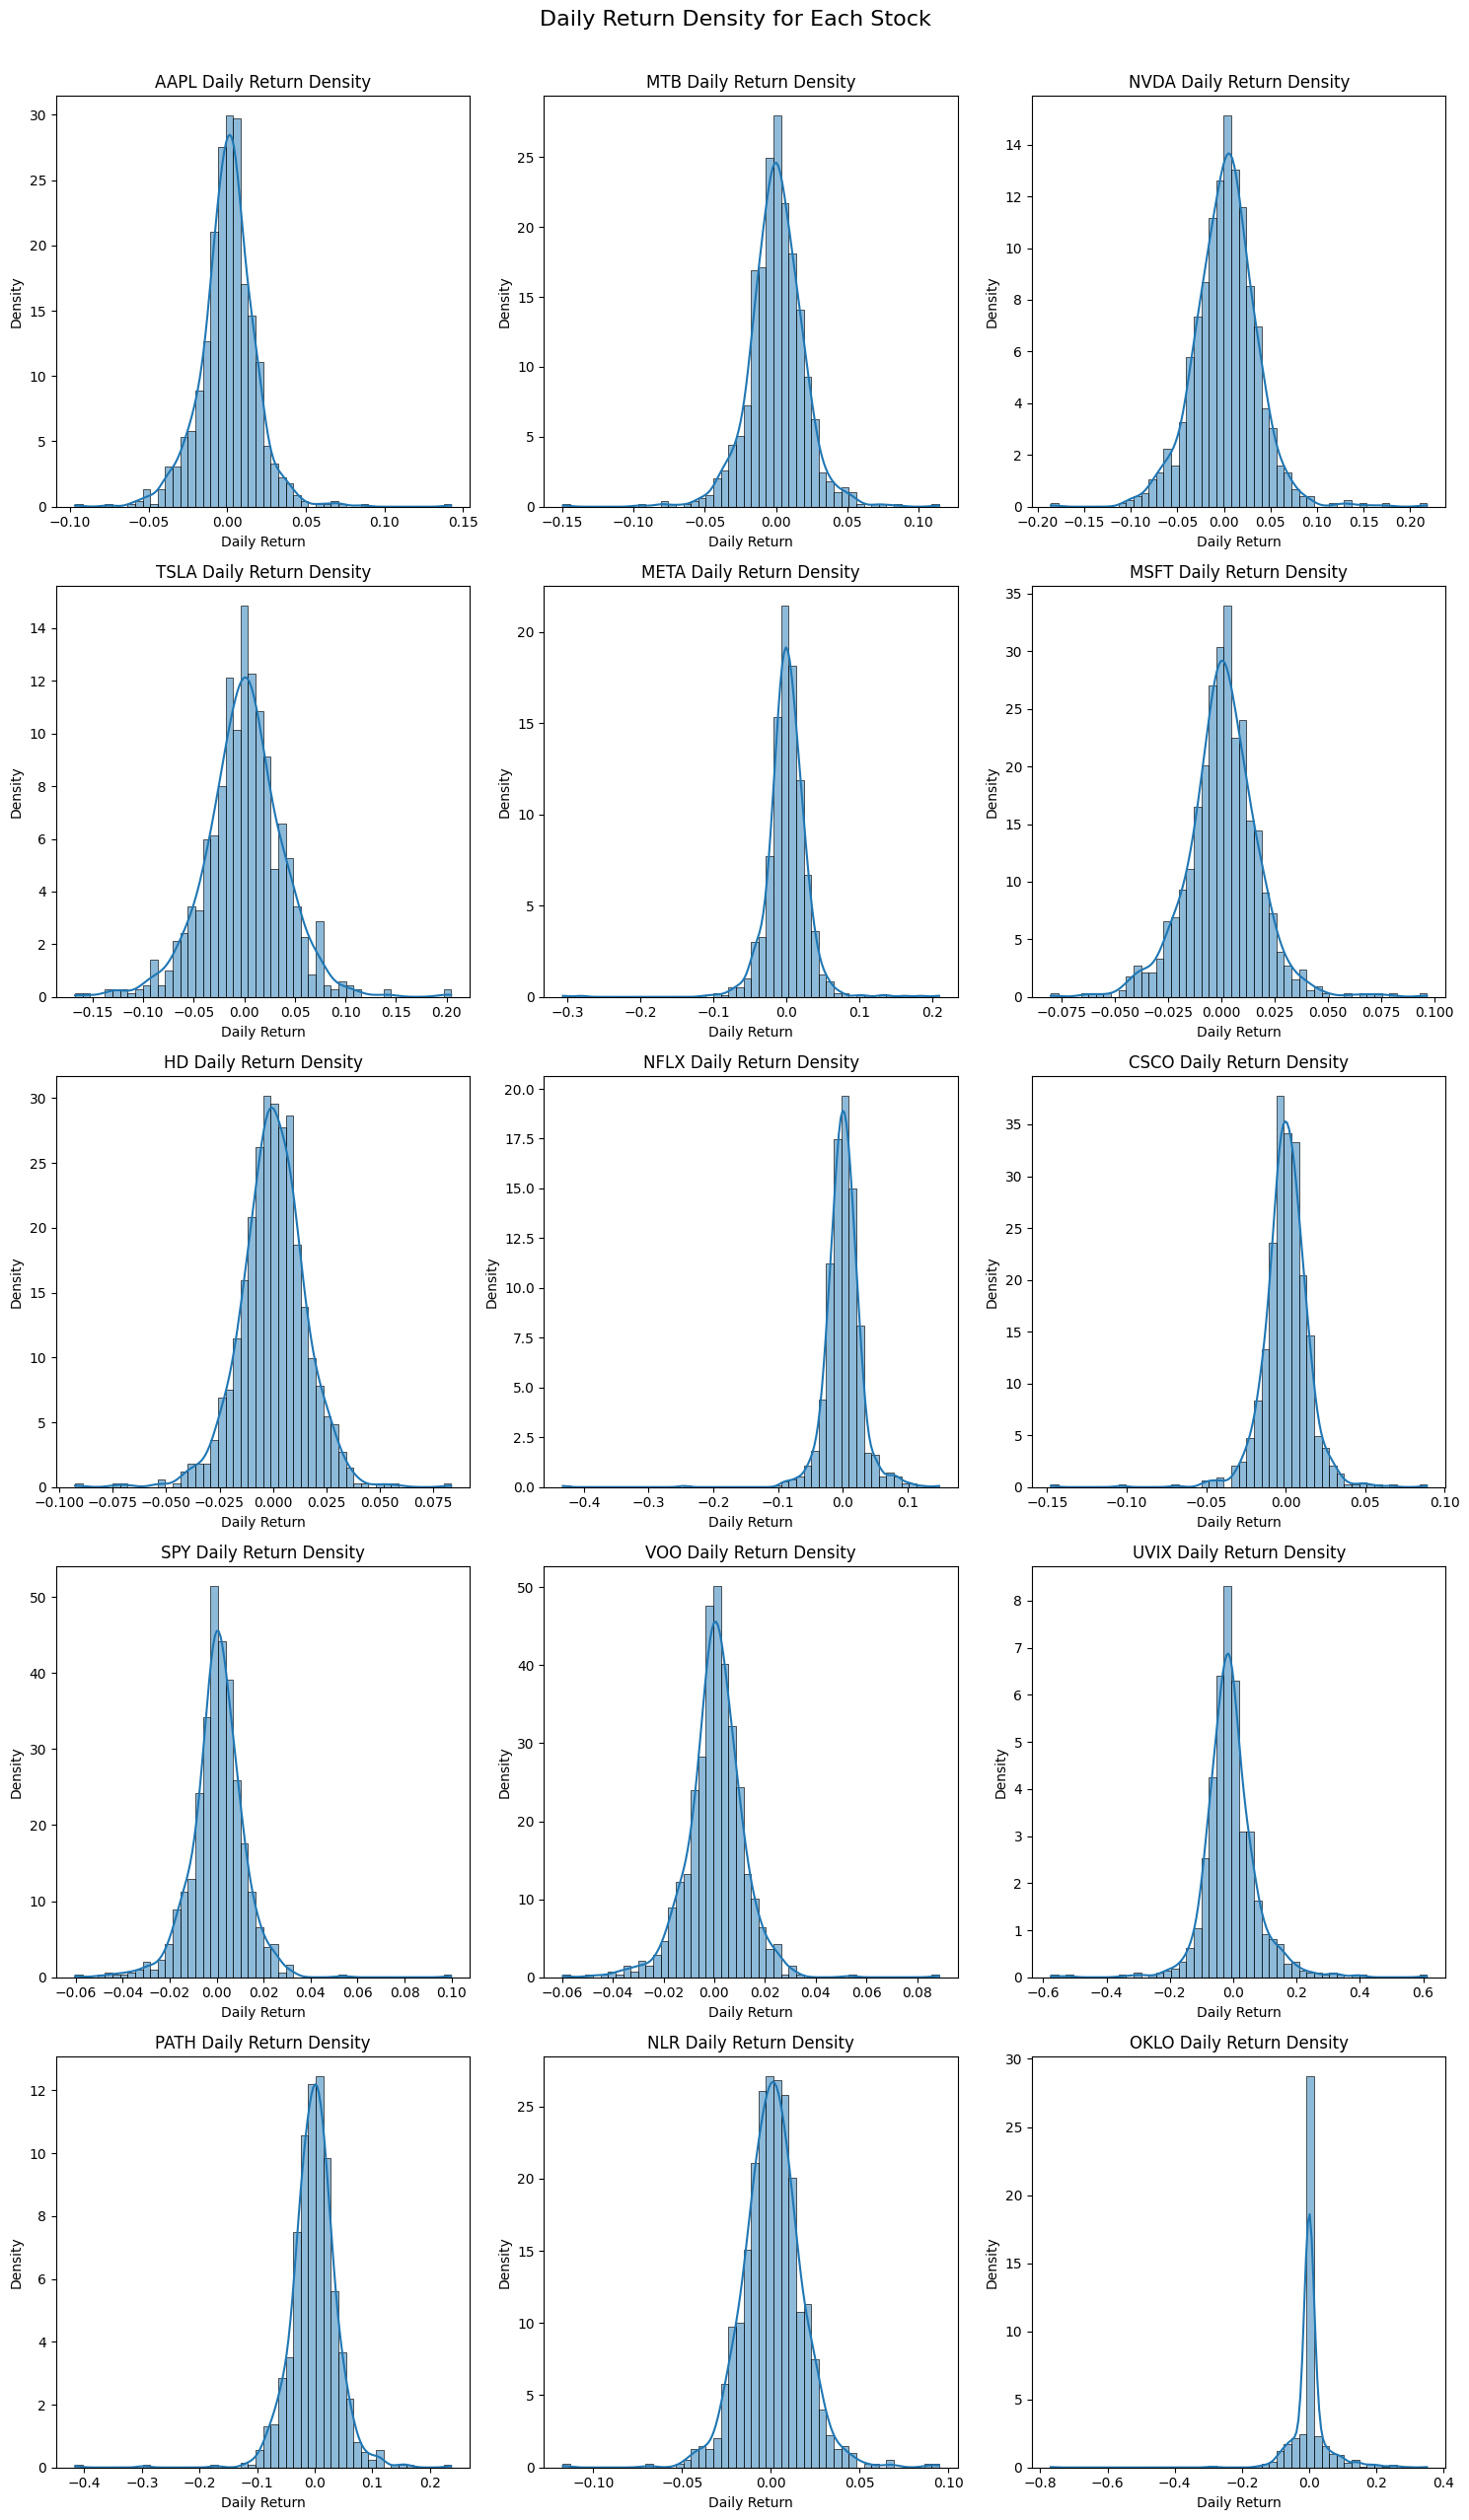

In [ ]:
# Ensure daily_returns is available and contains the data
if 'daily_returns' not in globals():
    print("Please run the cell that calculates daily_returns first.")
else:
    # Create subplots for each stock
    num_tickers = len(tickers)
    # Determine the number of rows needed based on 3 columns per row
    num_rows = num_tickers // 3 + (num_tickers % 3 > 0)

    fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, num_rows * 5))
    axes = axes.ravel()  # Flatten the 2D array of axes for easy iteration

    for i, ticker in enumerate(tickers):
        ax = axes[i]
        # Plot histogram with KDE for each stock's daily returns
        sns.histplot(log_returns[ticker].dropna(), kde=True, bins=50, stat='density', ax=ax)
        ax.set_title(f'{ticker} Daily Return Density')
        ax.set_xlabel('Daily Return')
        ax.set_ylabel('Density')


    # Hide any unused subplots if the number of tickers is not a multiple of 3
    for j in range(num_tickers, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.suptitle('Daily Return Density for Each Stock', y=1.02, fontsize=16)
    plt.show()

##Rolling Sharpe Ratio


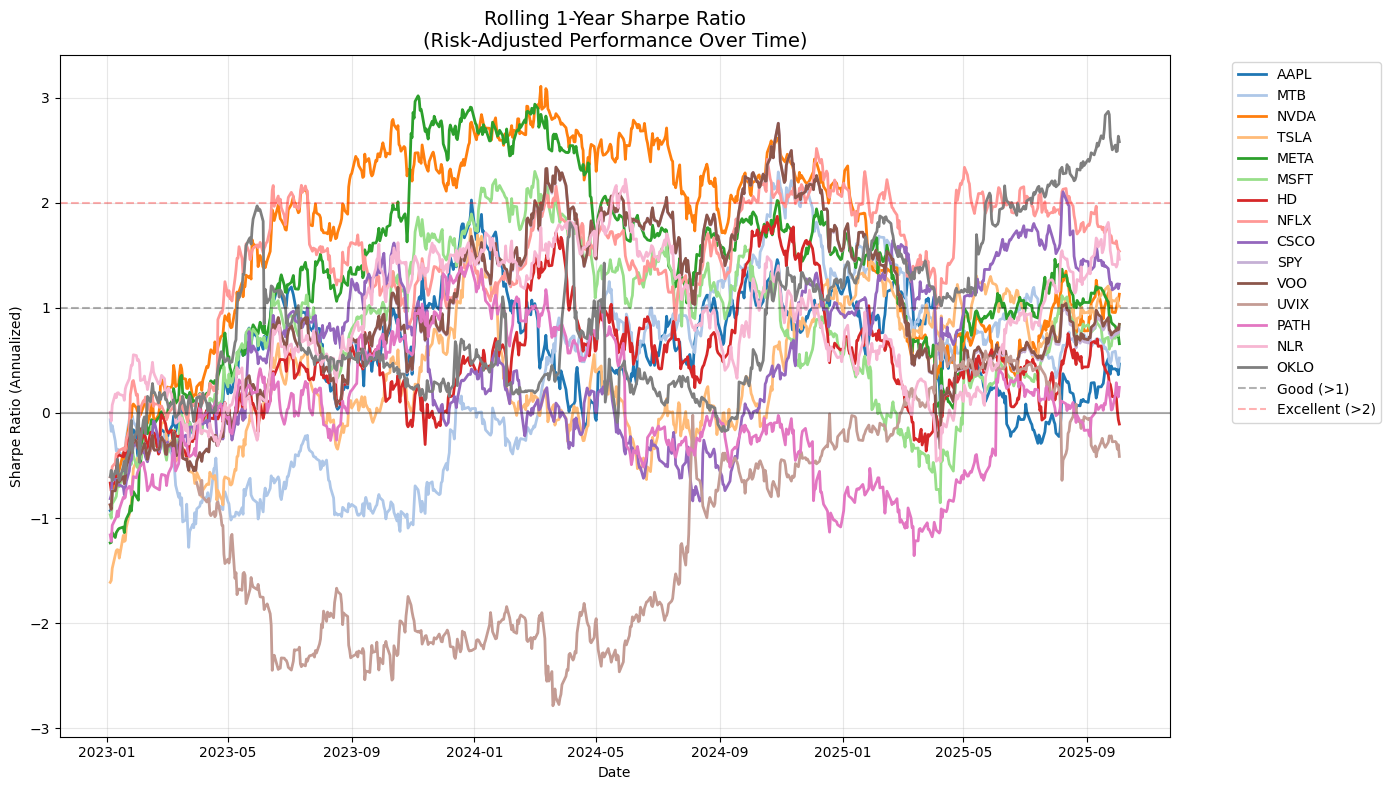


Sharpe Ratio Interpretation:
< 0: Losing money (negative risk-adjusted returns)
0-1: Positive but subpar
1-2: Good
> 2: Excellent (rare to sustain)


In [ ]:
# Calculate rolling Sharpe ratio
window = 252  # One year of trading days
risk_free_rate = 0.037 / 252  # 2% annual rate converted to daily

# Initialize figure
plt.figure(figsize=(14, 8))

# Get a color palette with more contrast
colors = sns.color_palette('tab20', len(tickers))

for i, ticker in enumerate(tickers):
    # Calculate excess returns (return - risk free rate)
    excess_returns = returns[ticker] - risk_free_rate

    # Rolling mean and std
    rolling_mean = excess_returns.rolling(window).mean()
    rolling_std = returns[ticker].rolling(window).std()

    # Sharpe ratio = mean excess return / standard deviation
    # Annualize by multiplying by sqrt(252)
    rolling_sharpe = (rolling_mean / rolling_std) * np.sqrt(252)

    # Plot with assigned color
    plt.plot(rolling_sharpe.index, rolling_sharpe.values,
             label=f'{ticker}', linewidth=2, color=colors[i])

# Add reference lines
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.axhline(y=1, color='black', linestyle='--', alpha=0.3, label='Good (>1)')
plt.axhline(y=2, color='red', linestyle='--', alpha=0.3, label='Excellent (>2)')

plt.title('Rolling 1-Year Sharpe Ratio\n(Risk-Adjusted Performance Over Time)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio (Annualized)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nSharpe Ratio Interpretation:")
print("< 0: Losing money (negative risk-adjusted returns)")
print("0-1: Positive but subpar")
print("1-2: Good")
print("> 2: Excellent (rare to sustain)")

##EMA Crossover

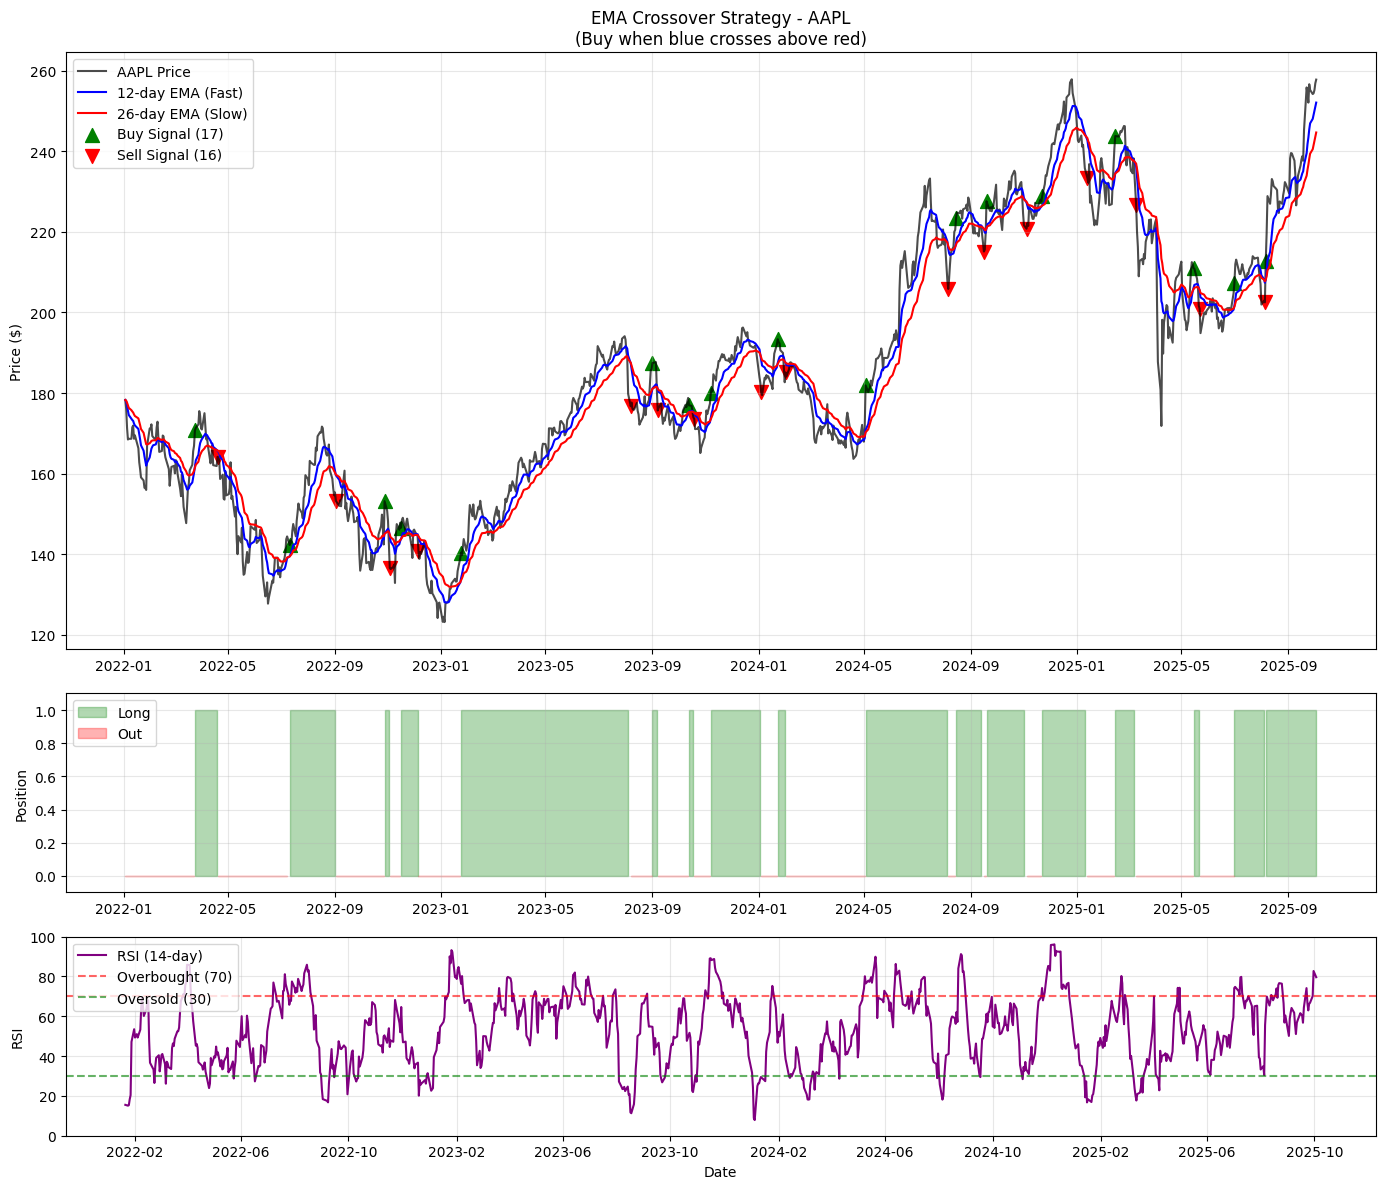


Strategy Performance for AAPL:
Buy & Hold Return: 44.60%
EMA Strategy Return: 11.11%
Number of trades: 33


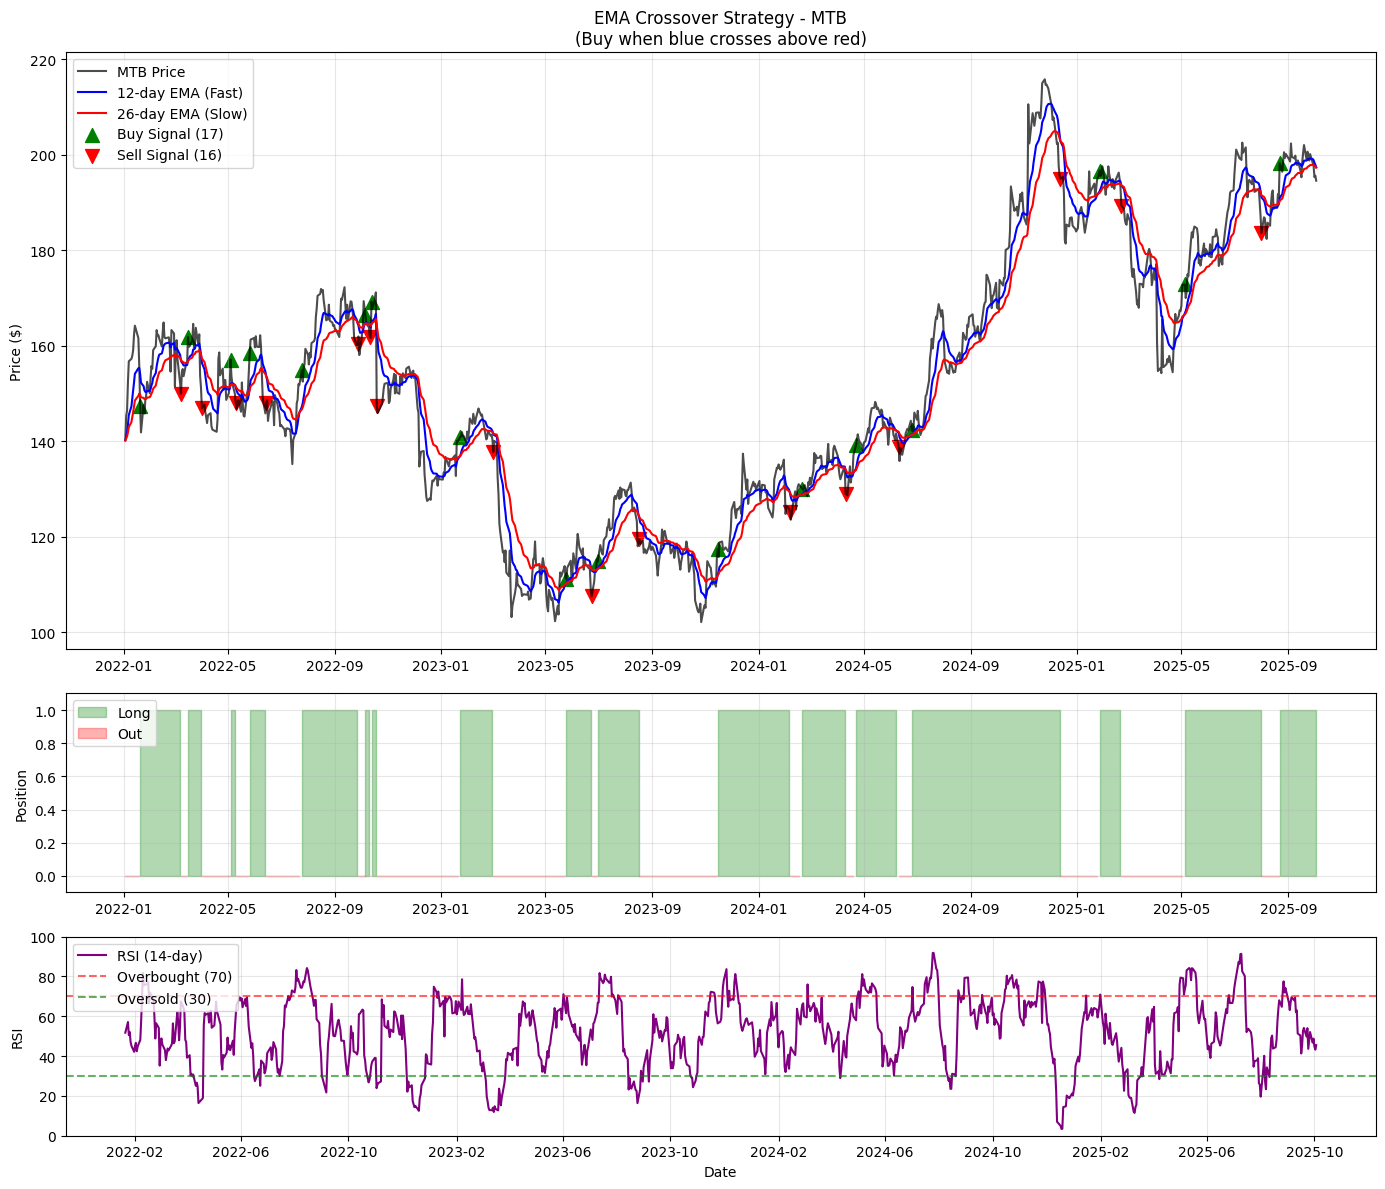


Strategy Performance for MTB:
Buy & Hold Return: 38.77%
EMA Strategy Return: 1.42%
Number of trades: 33


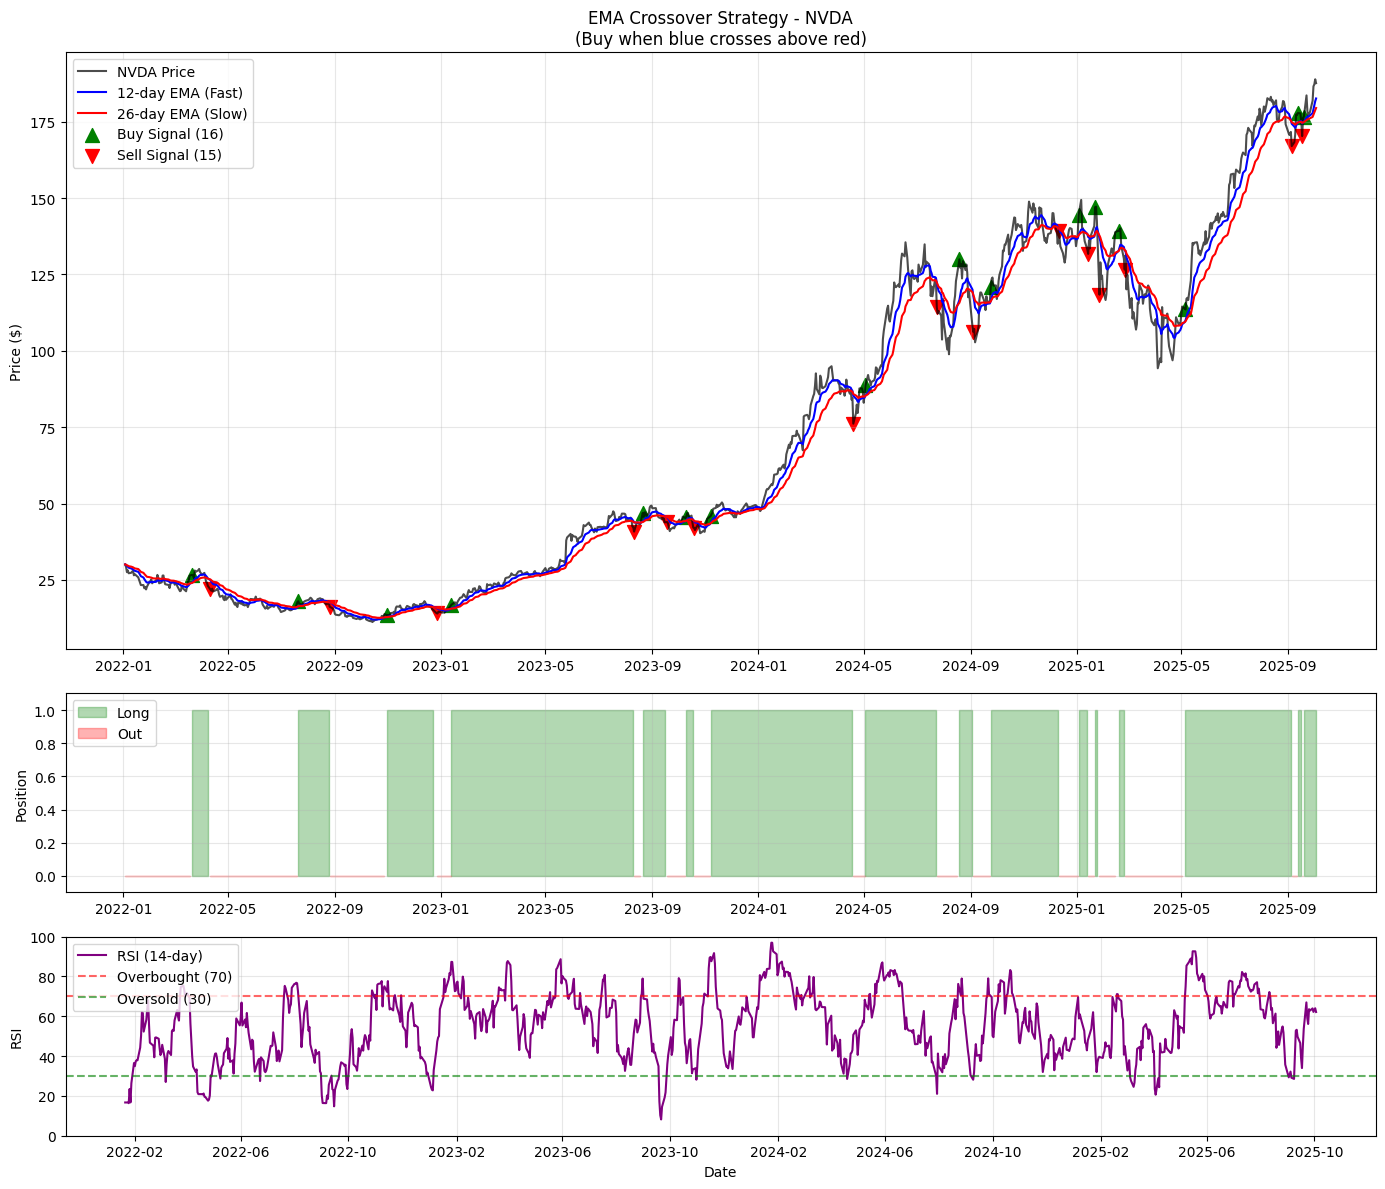


Strategy Performance for NVDA:
Buy & Hold Return: 524.06%
EMA Strategy Return: 221.83%
Number of trades: 31


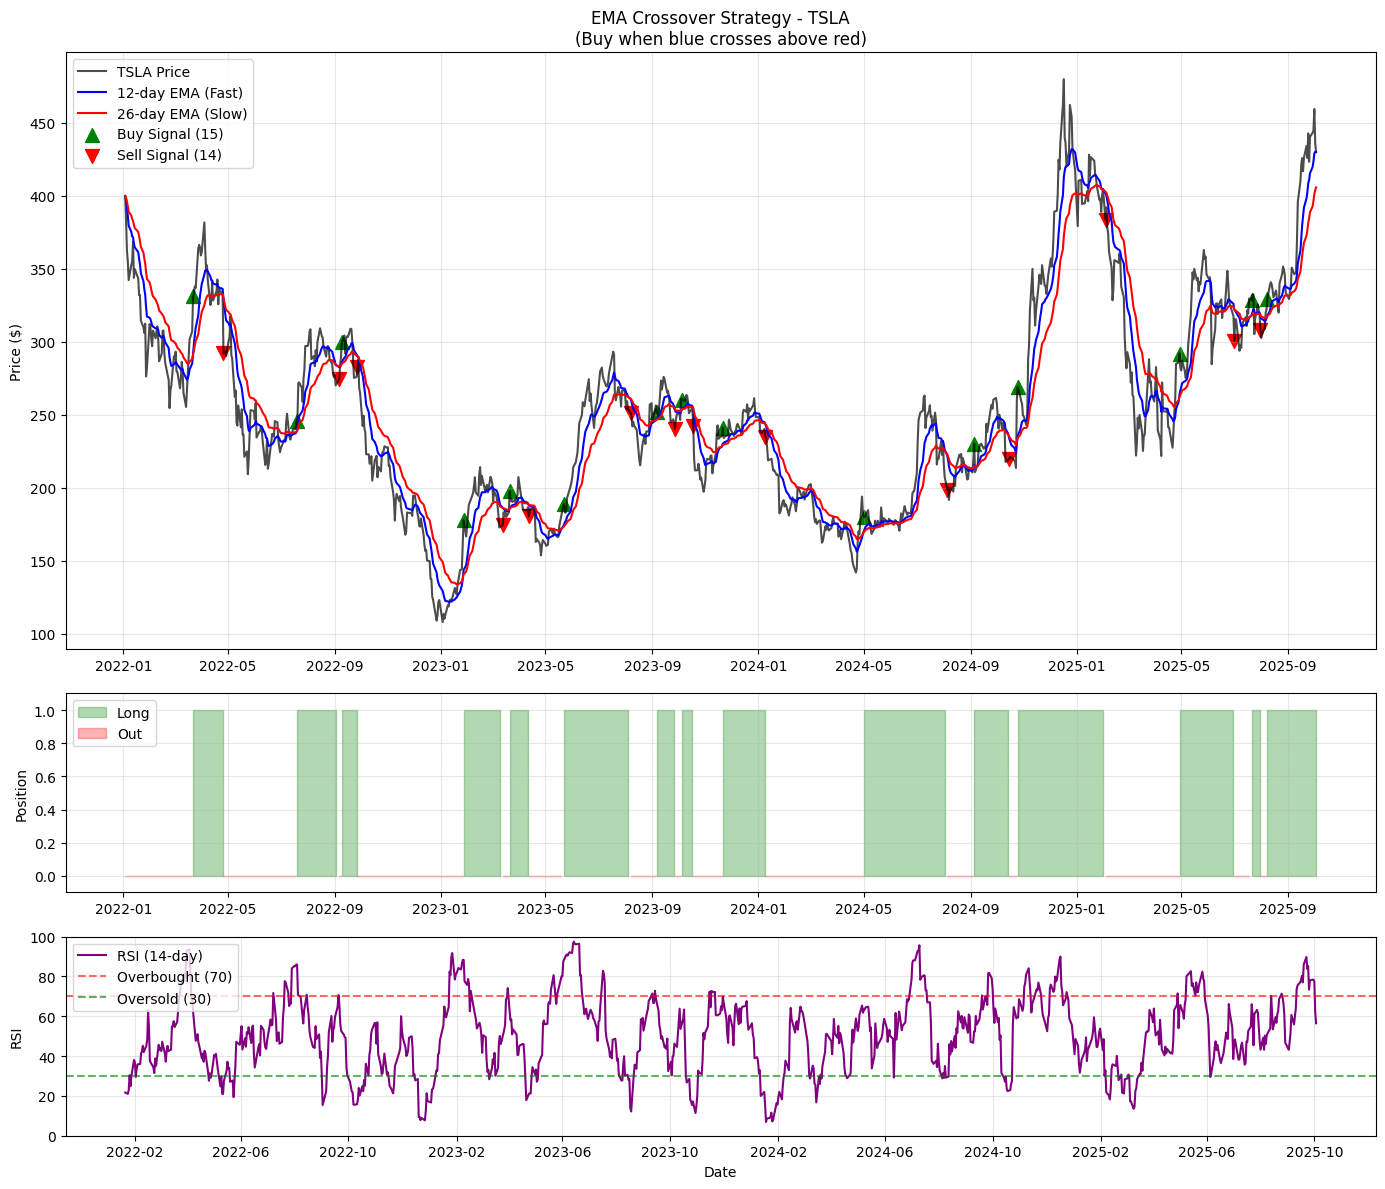


Strategy Performance for TSLA:
Buy & Hold Return: 7.48%
EMA Strategy Return: 82.38%
Number of trades: 29


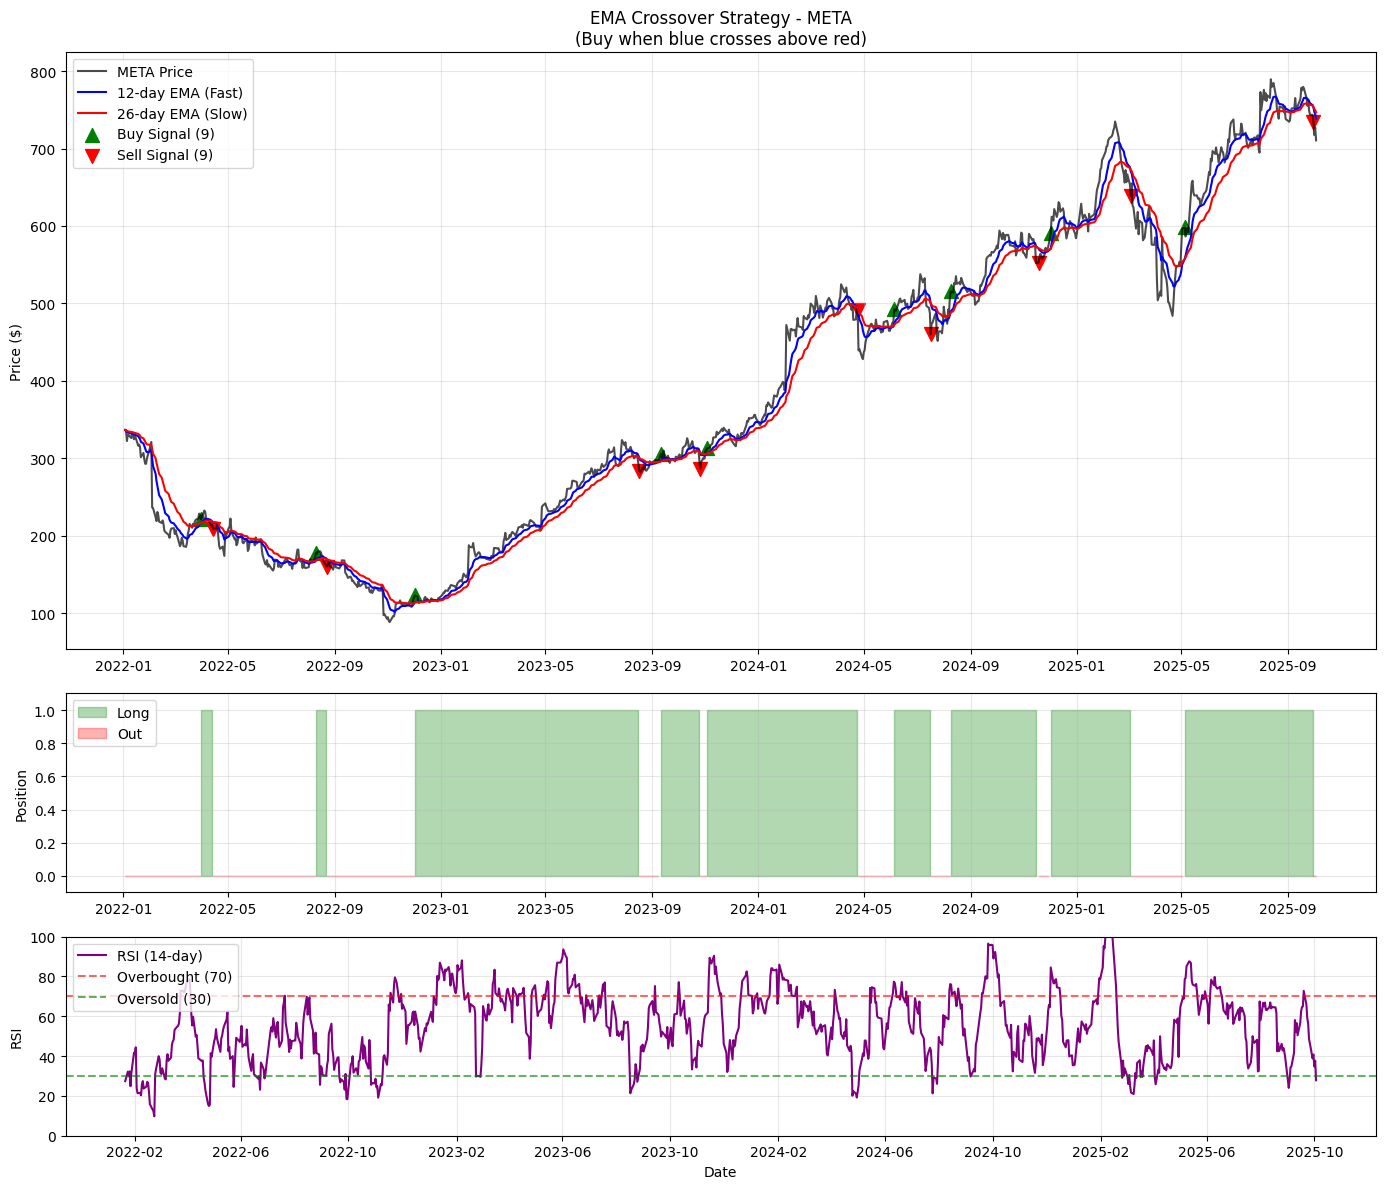


Strategy Performance for META:
Buy & Hold Return: 111.18%
EMA Strategy Return: 285.27%
Number of trades: 18


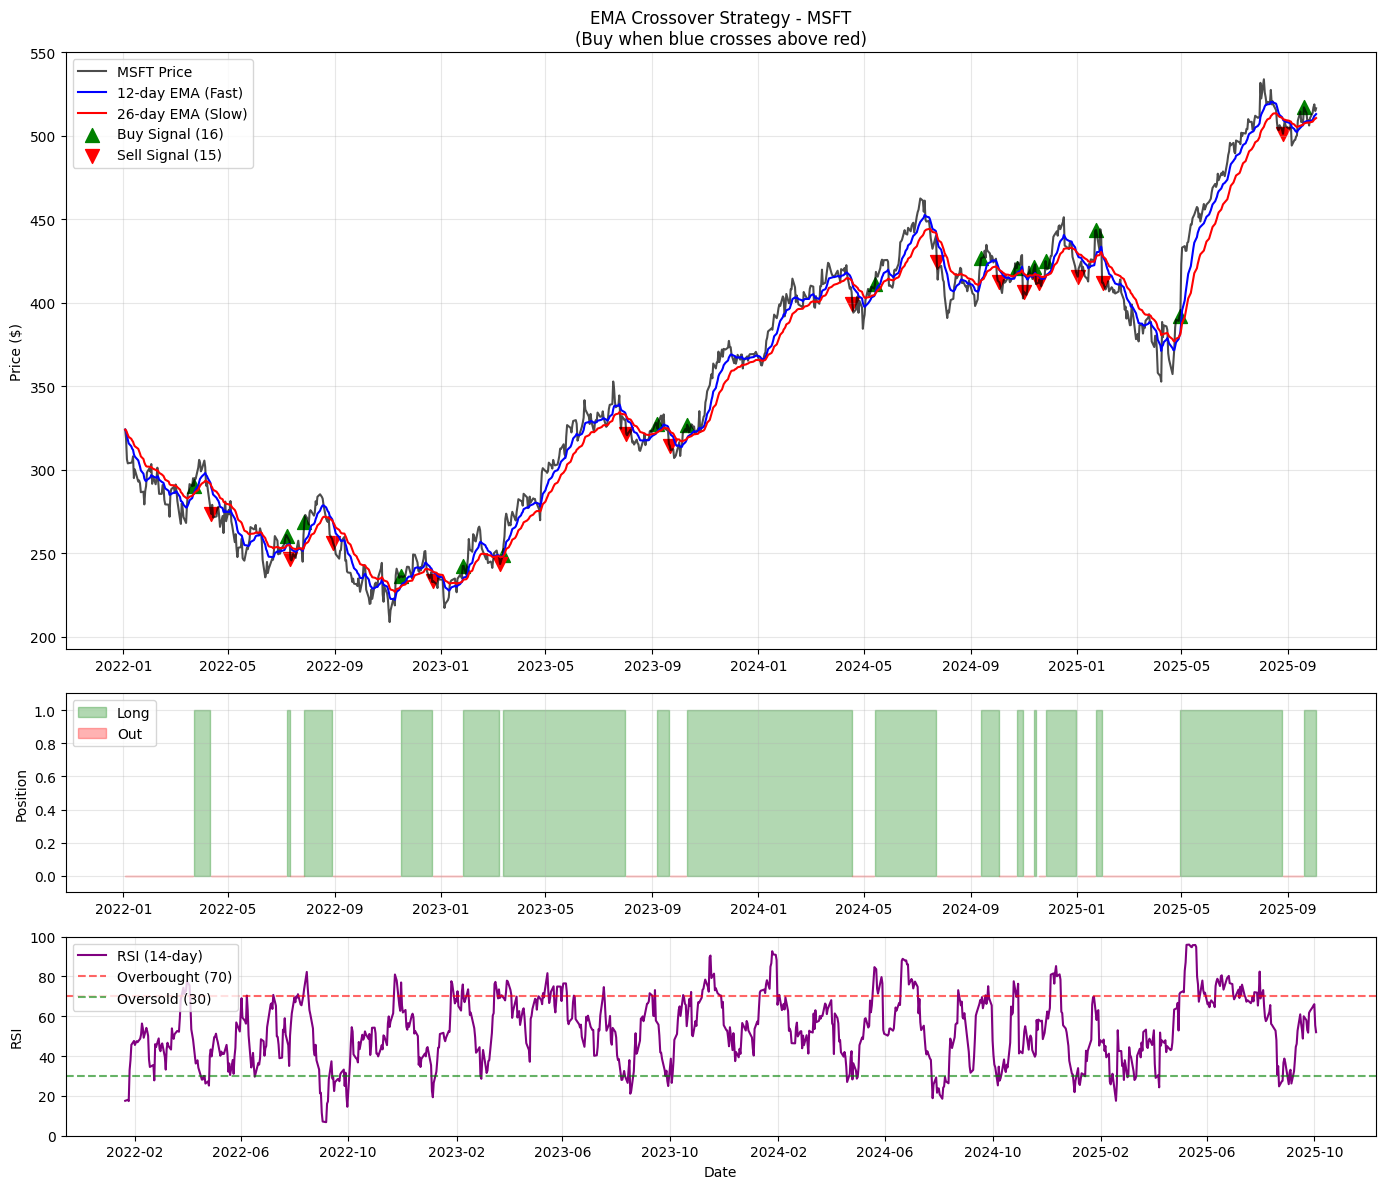


Strategy Performance for MSFT:
Buy & Hold Return: 59.43%
EMA Strategy Return: 39.79%
Number of trades: 31


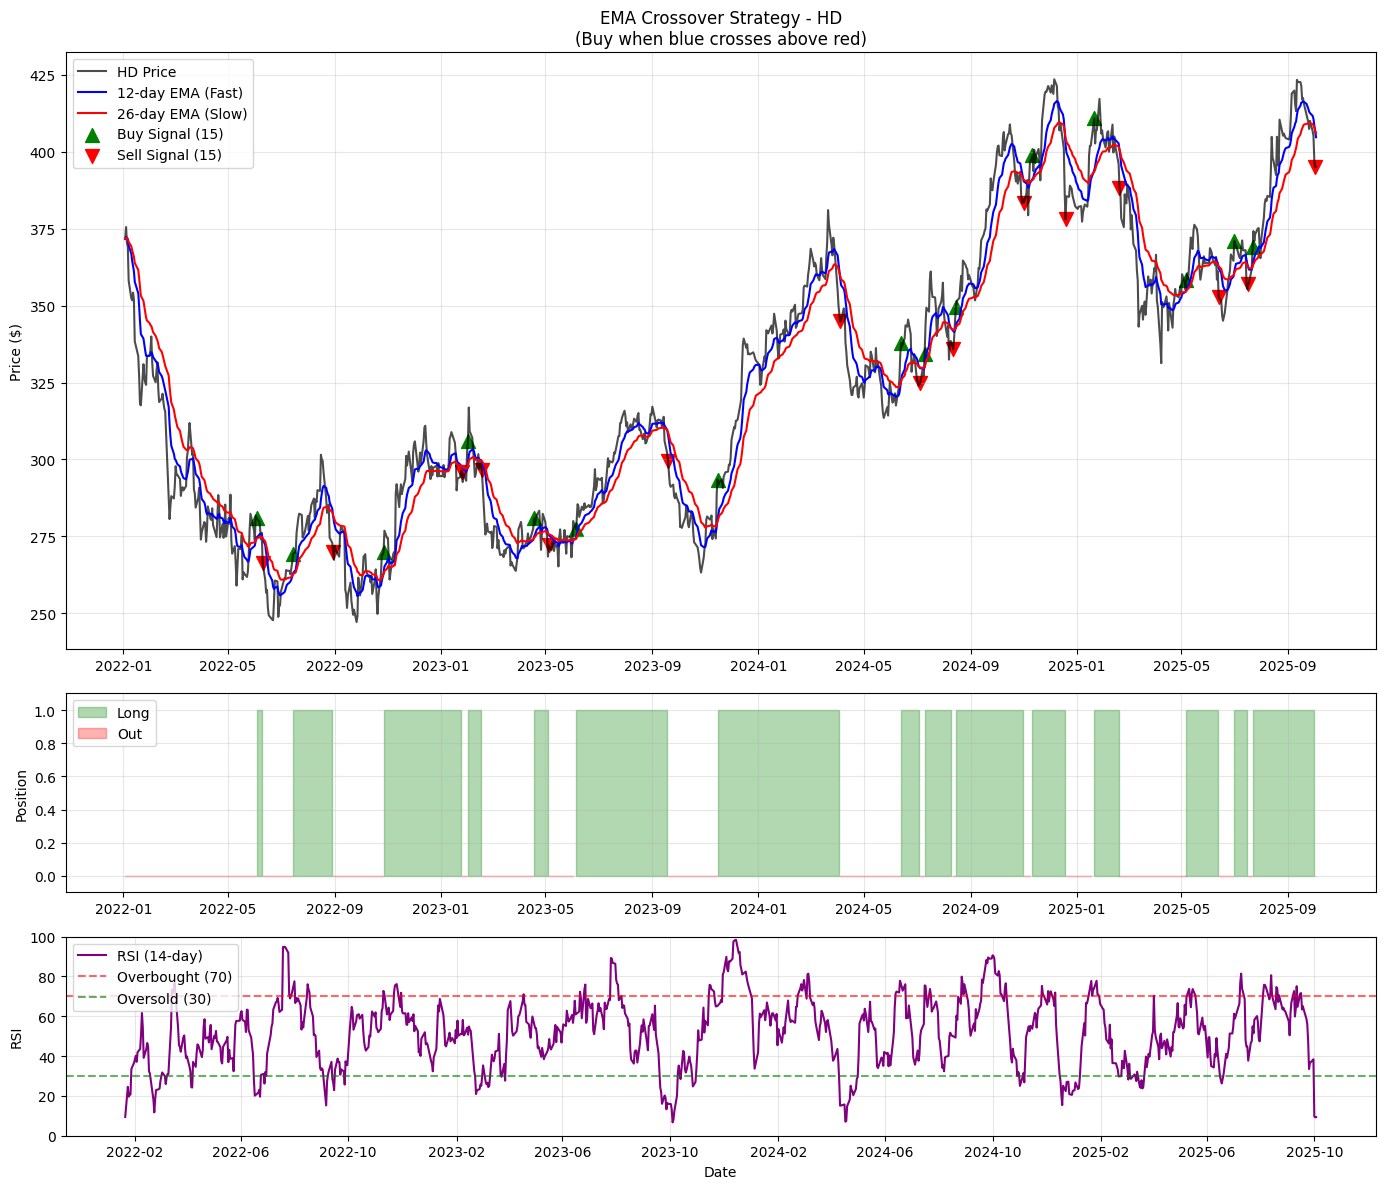


Strategy Performance for HD:
Buy & Hold Return: 6.28%
EMA Strategy Return: 19.56%
Number of trades: 30


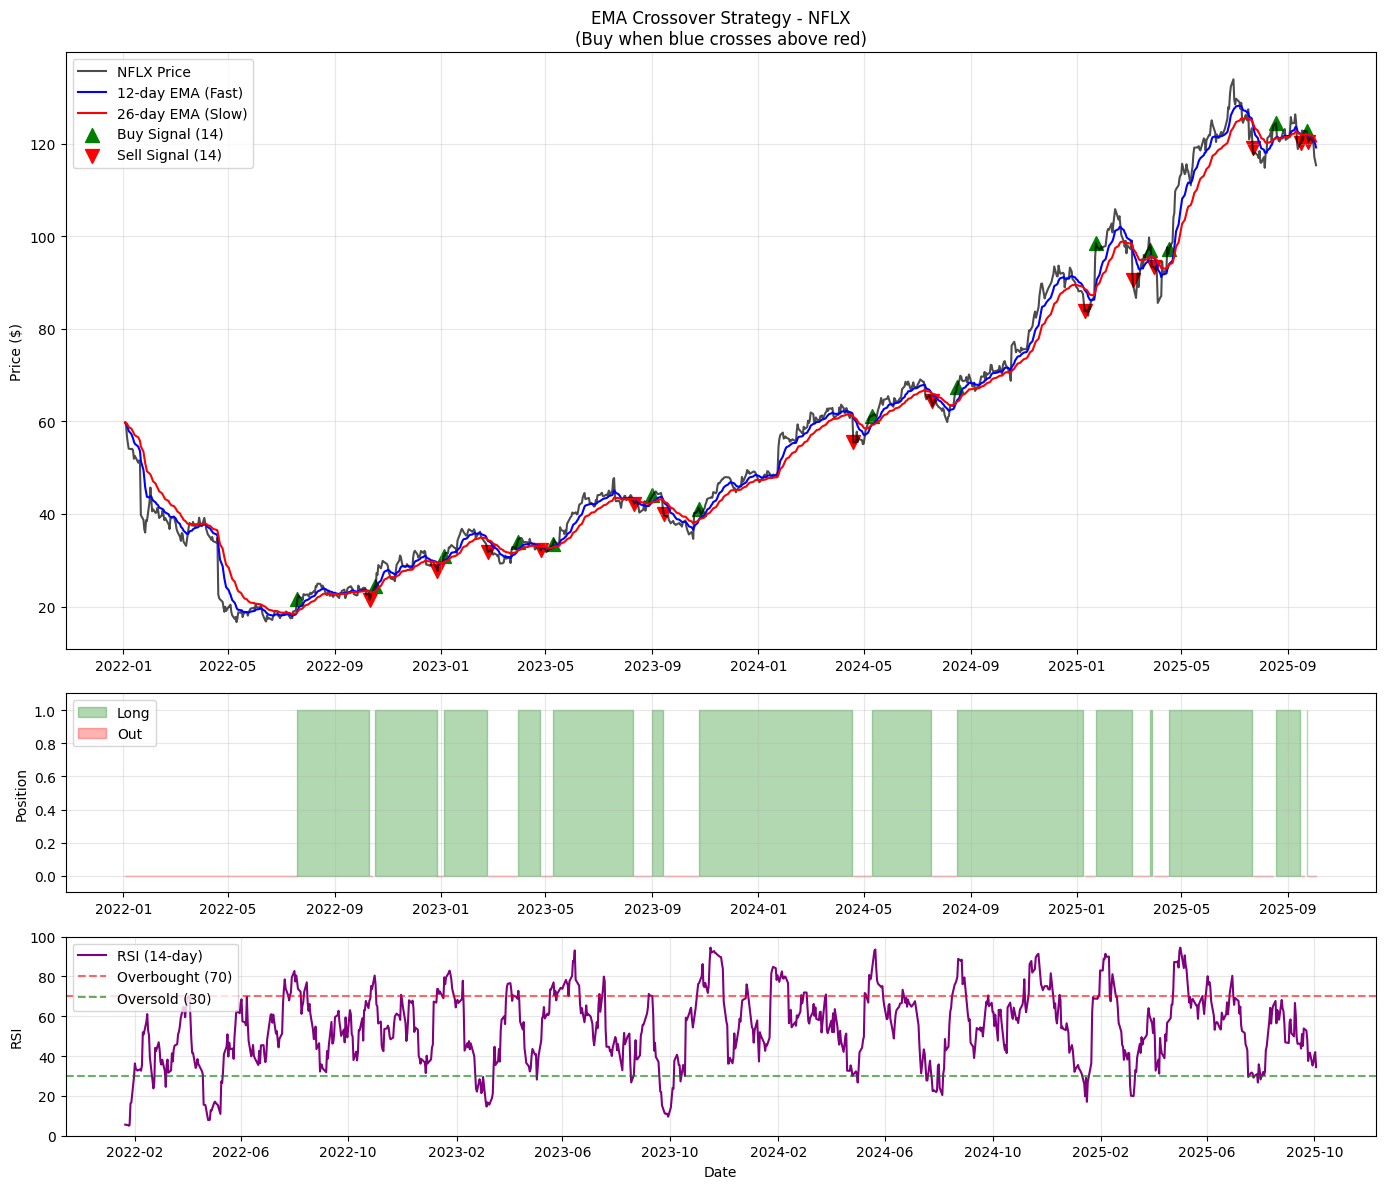


Strategy Performance for NFLX:
Buy & Hold Return: 93.07%
EMA Strategy Return: 124.84%
Number of trades: 28


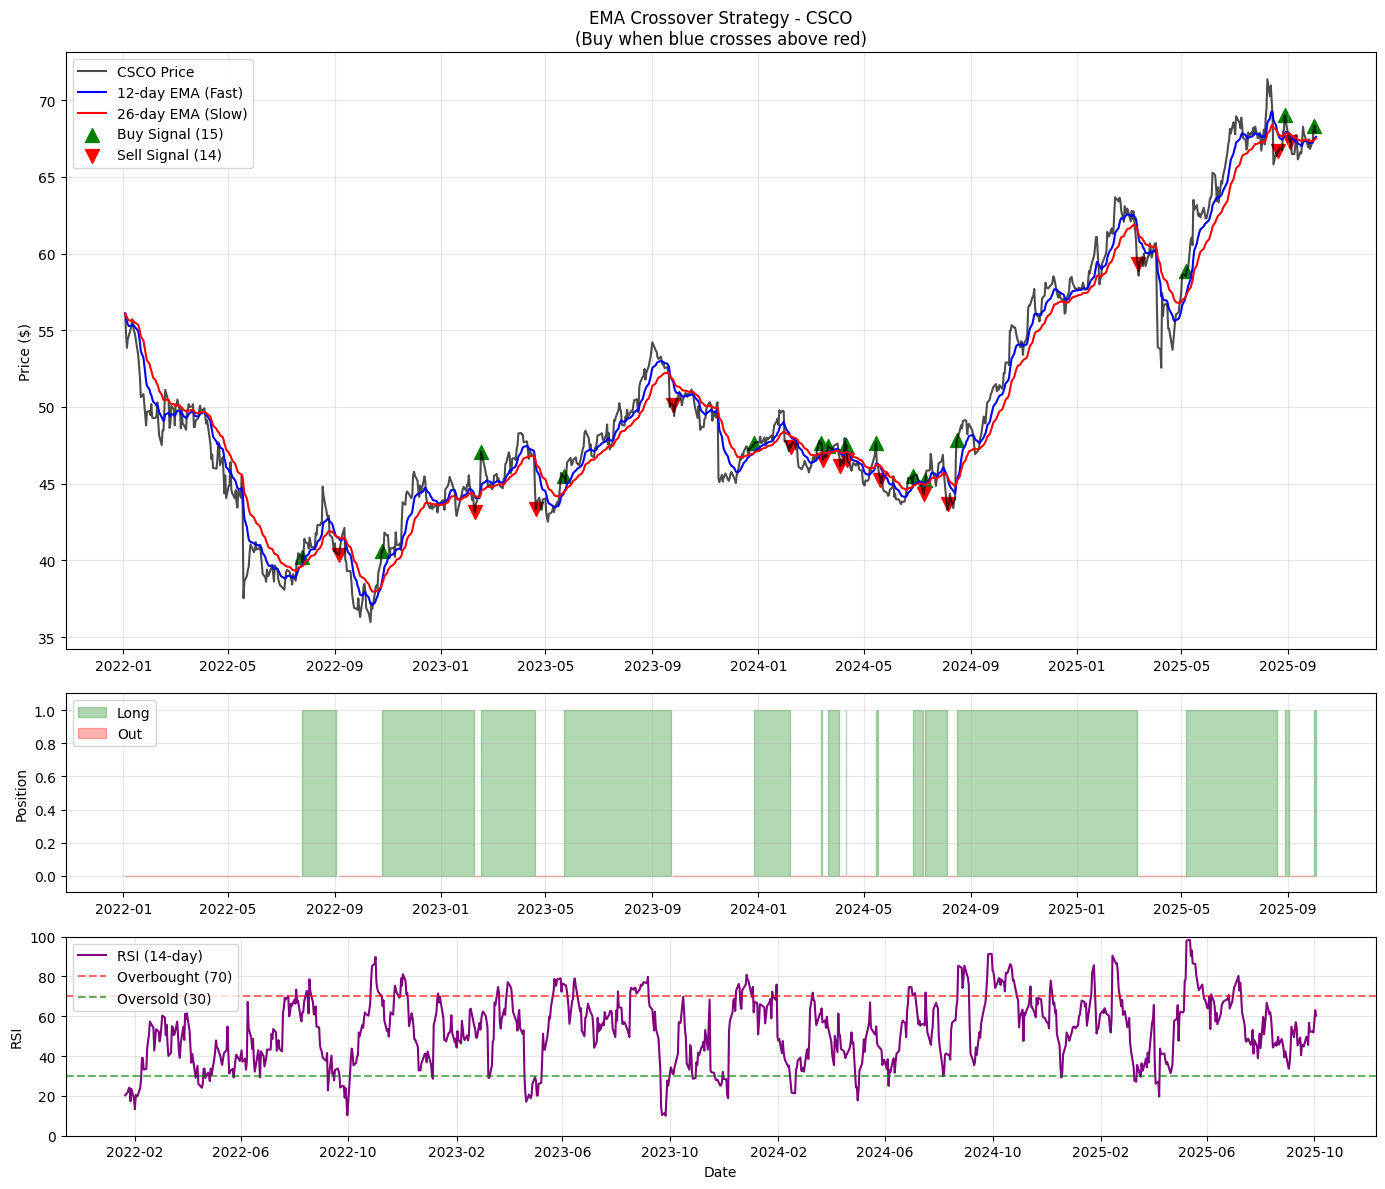


Strategy Performance for CSCO:
Buy & Hold Return: 21.08%
EMA Strategy Return: 21.24%
Number of trades: 29


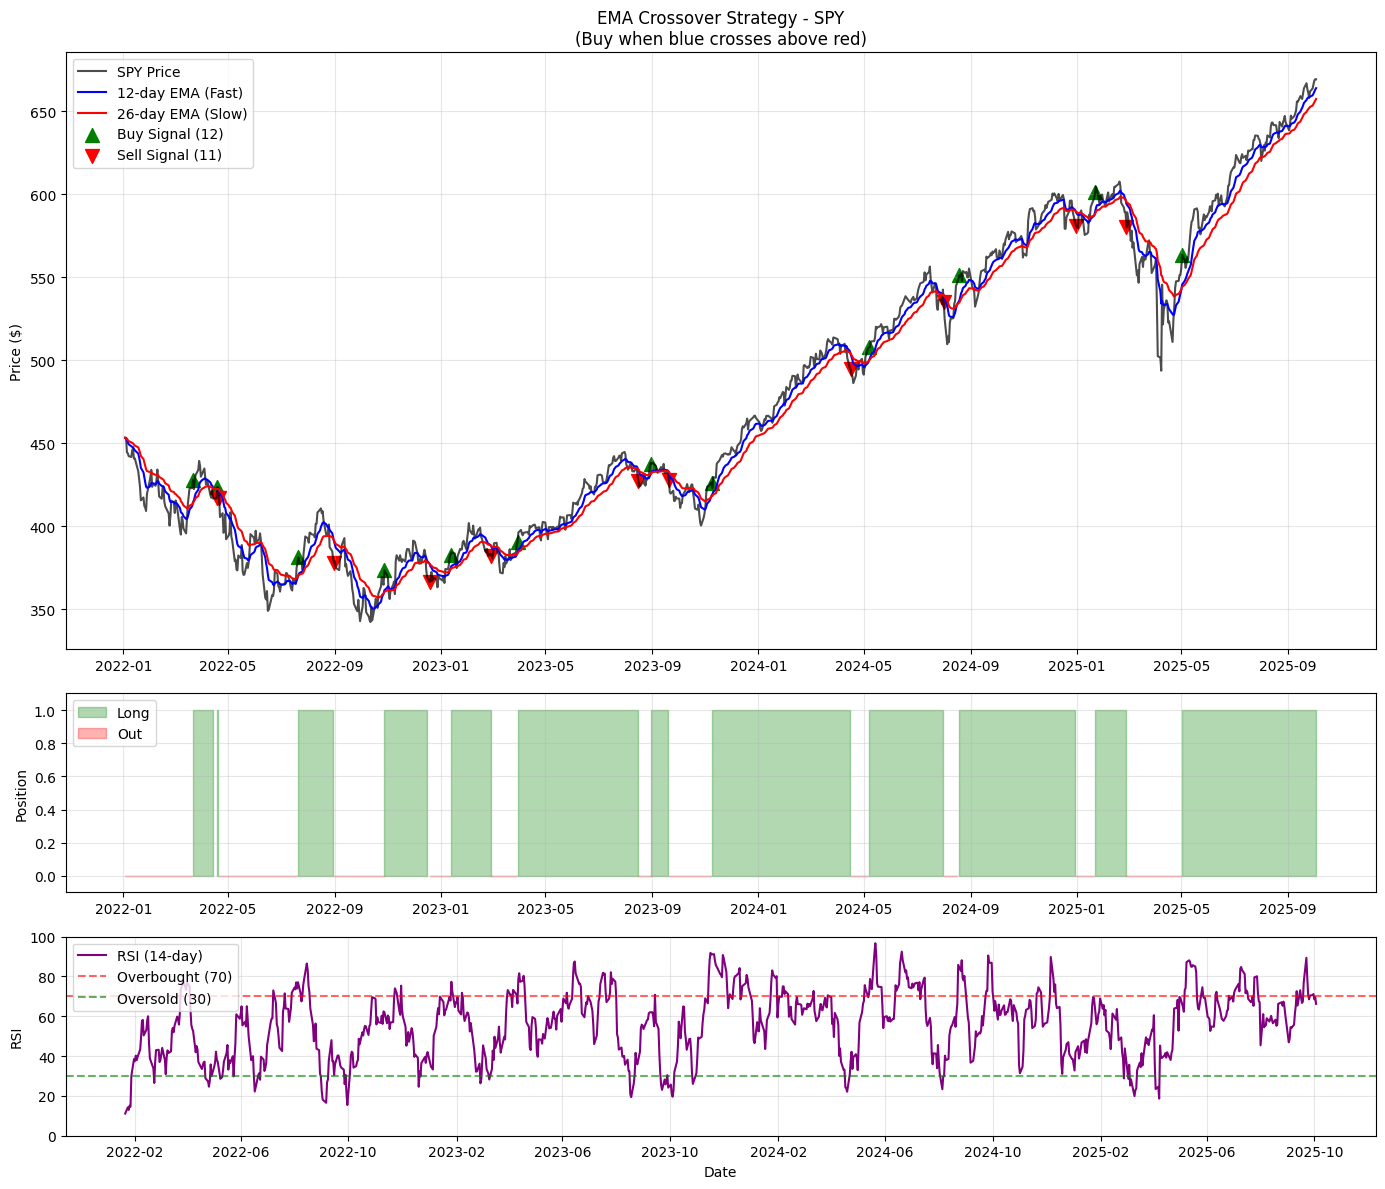


Strategy Performance for SPY:
Buy & Hold Return: 47.66%
EMA Strategy Return: 46.73%
Number of trades: 23


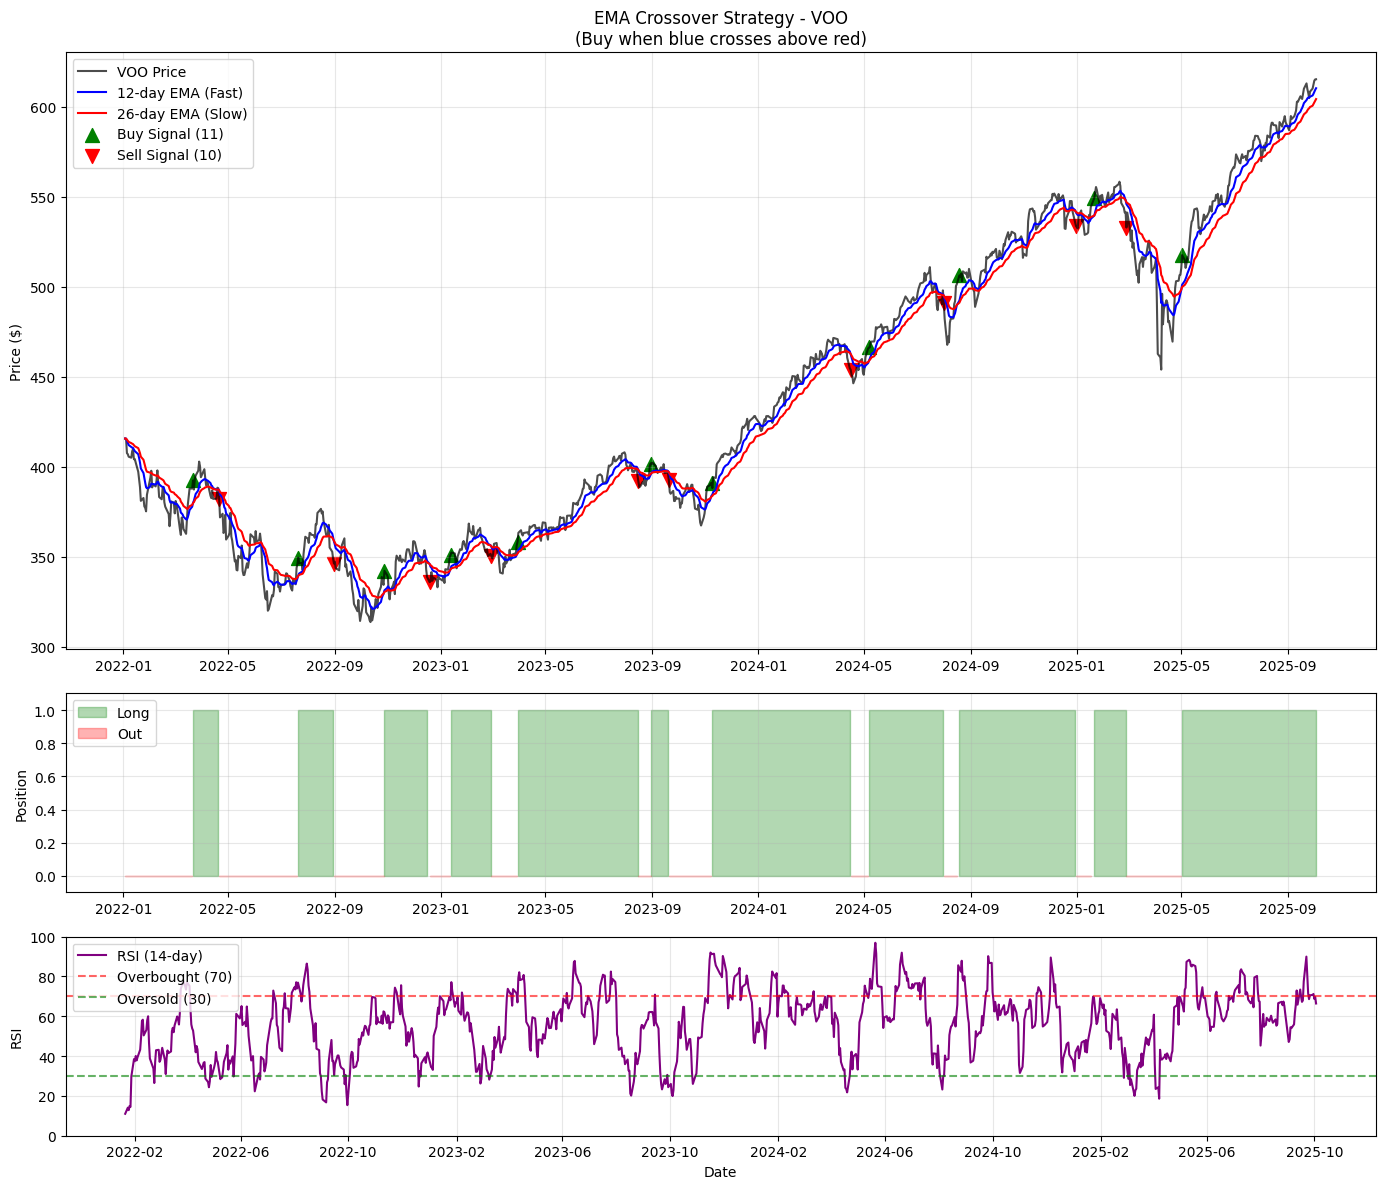


Strategy Performance for VOO:
Buy & Hold Return: 48.01%
EMA Strategy Return: 50.26%
Number of trades: 21


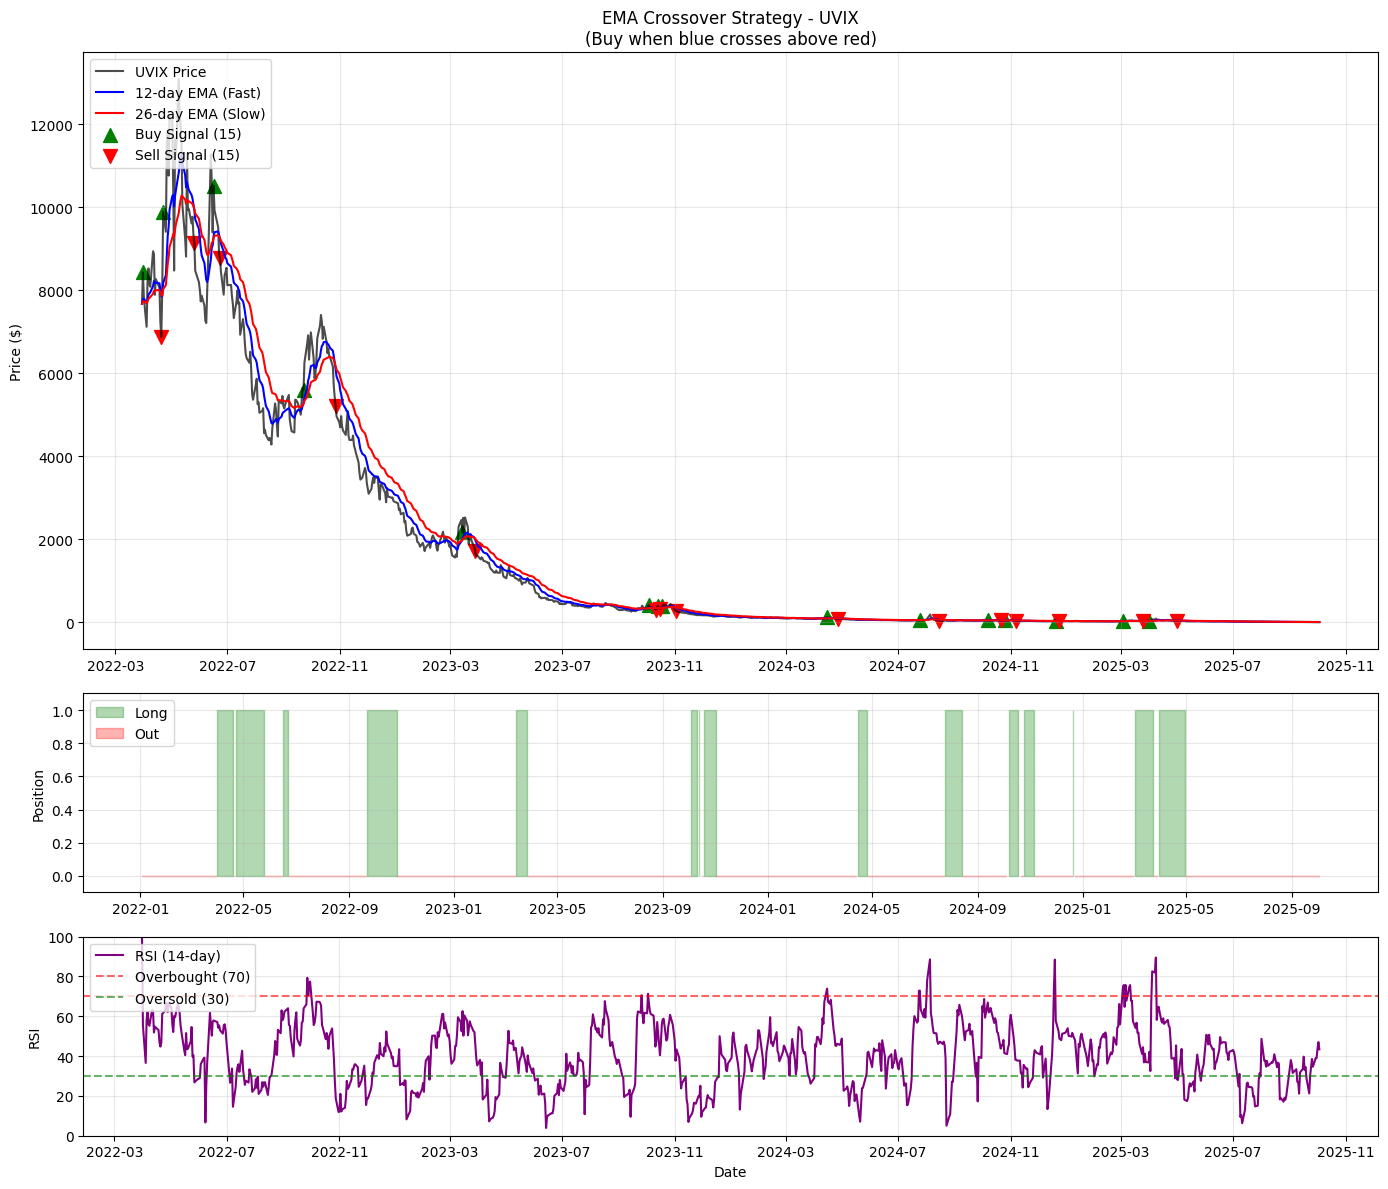


Strategy Performance for UVIX:
Buy & Hold Return: -99.87%
EMA Strategy Return: -95.98%
Number of trades: 30


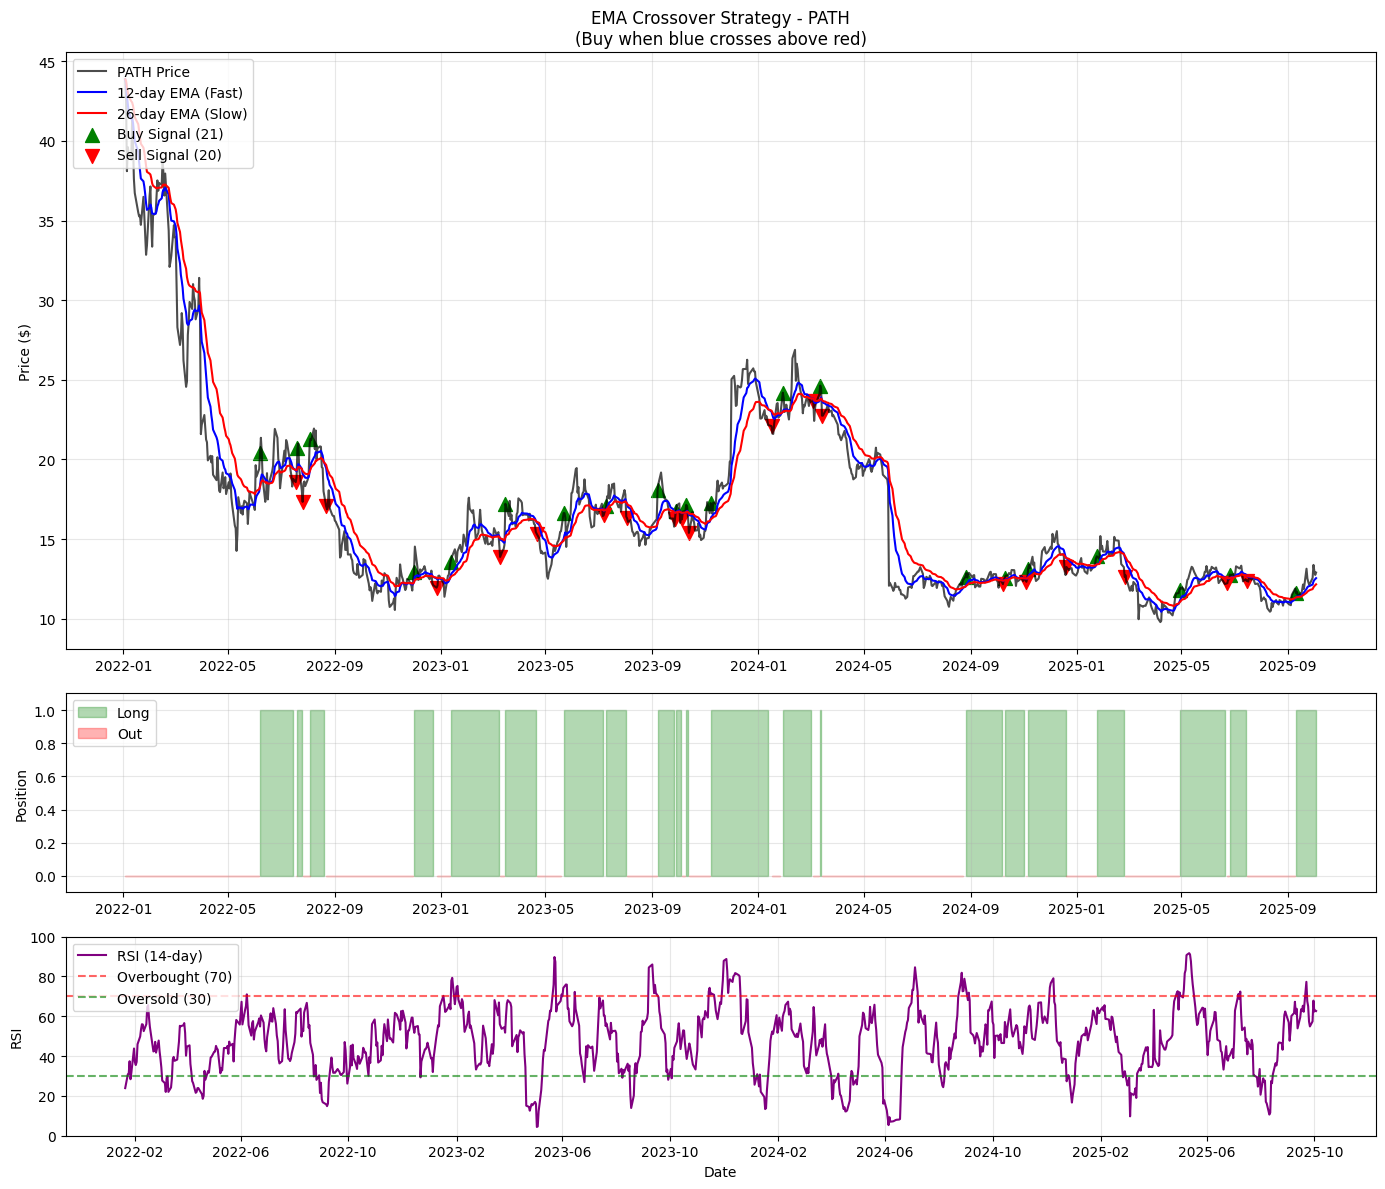


Strategy Performance for PATH:
Buy & Hold Return: -70.59%
EMA Strategy Return: -57.46%
Number of trades: 41


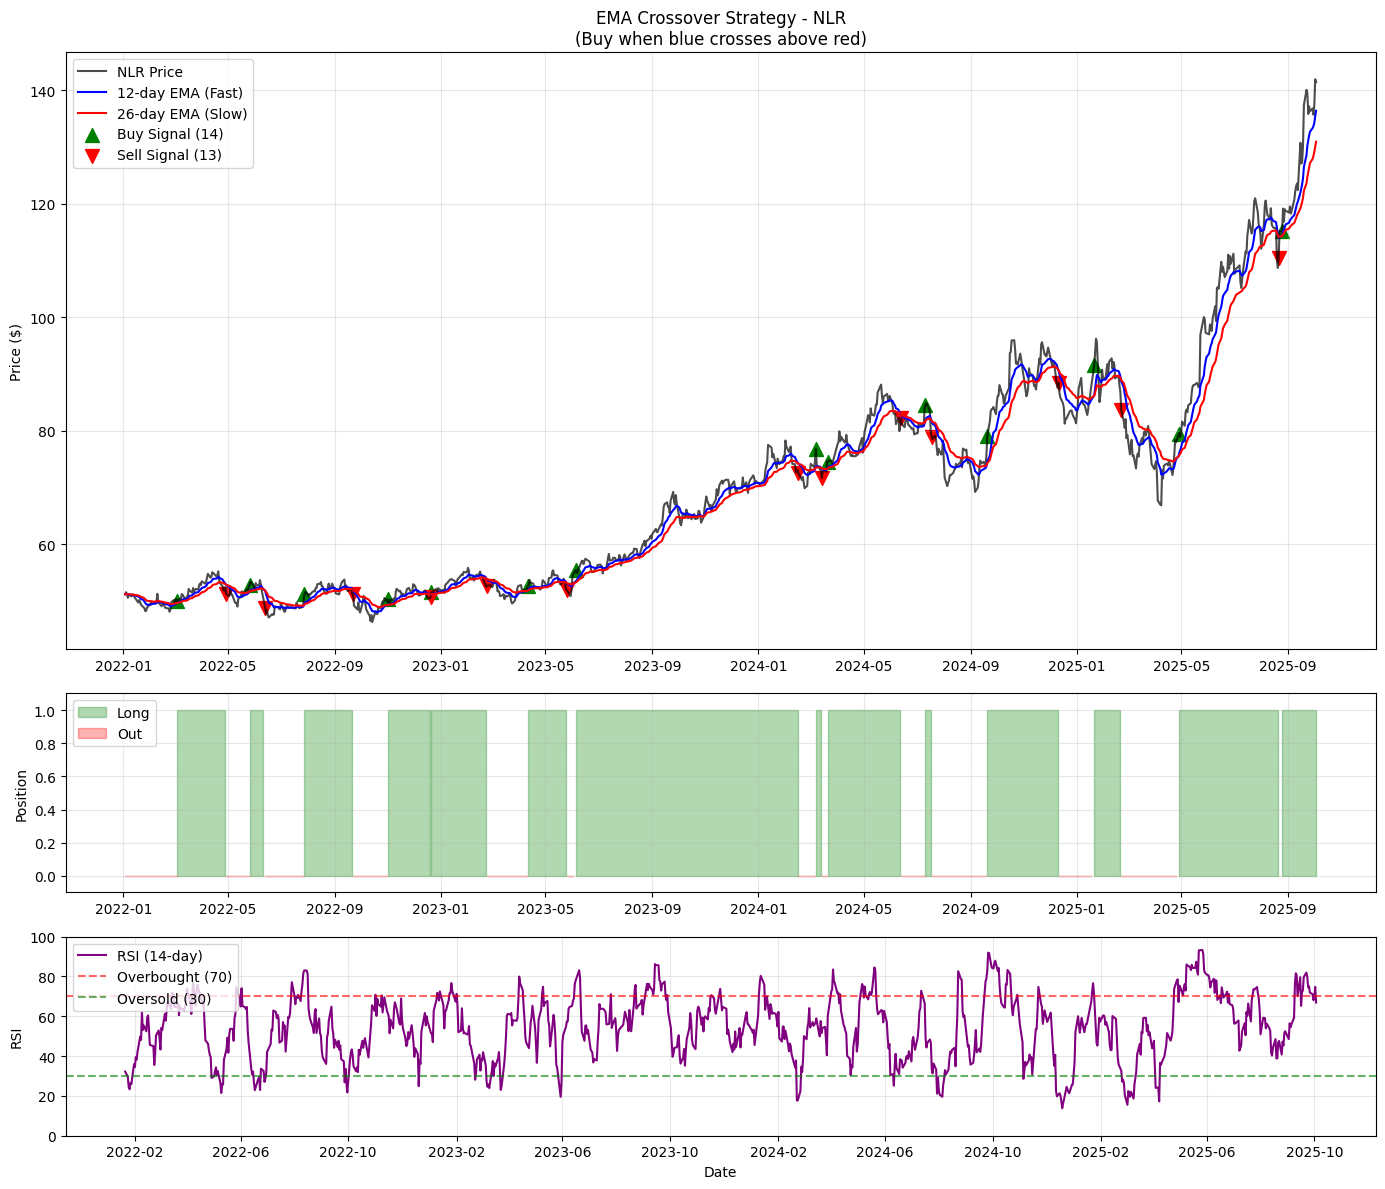


Strategy Performance for NLR:
Buy & Hold Return: 175.88%
EMA Strategy Return: 110.41%
Number of trades: 27


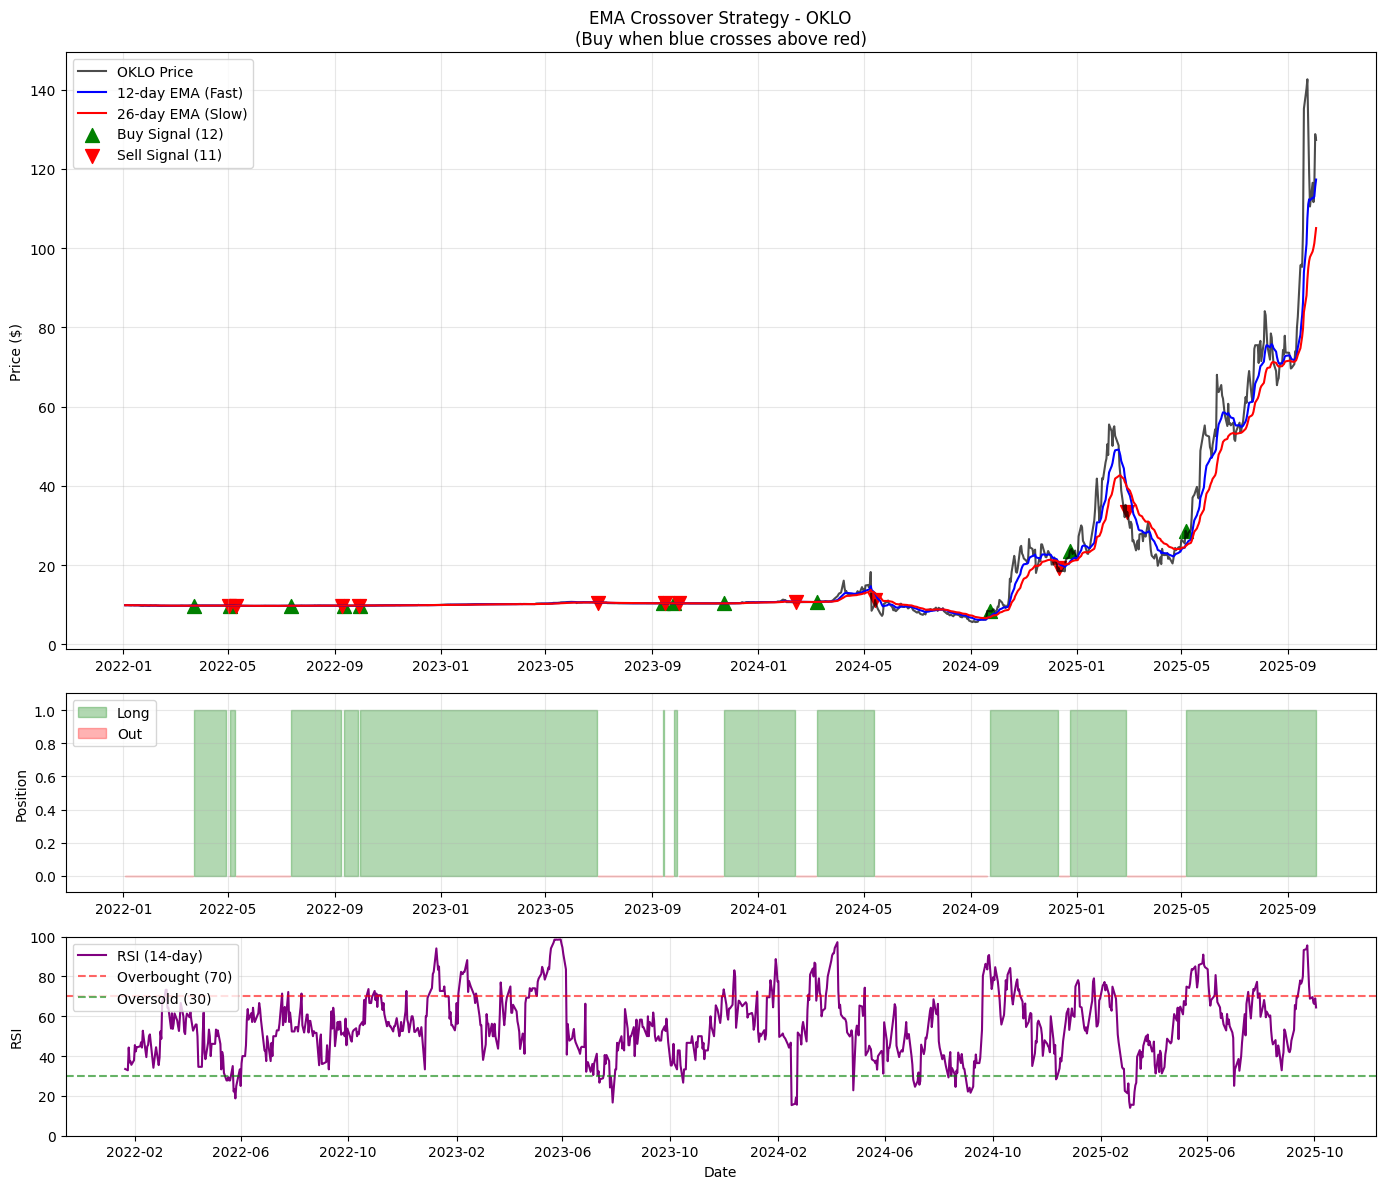


Strategy Performance for OKLO:
Buy & Hold Return: 1191.68%
EMA Strategy Return: 1533.40%
Number of trades: 23


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # Import for date formatting

for ticker in tickers:
    prices = data['Close'][ticker]

    # Calculate EMAs
    ema_short = prices.ewm(span=12, adjust=False).mean()
    ema_long = prices.ewm(span=26, adjust=False).mean()

    # Generate signals
    signals = pd.DataFrame(index=prices.index)
    signals['price'] = prices
    signals['ema_short'] = ema_short
    signals['ema_long'] = ema_long
    signals['signal'] = 0
    signals.loc[signals.index[12:], 'signal'] = np.where(
        signals['ema_short'][12:] > signals['ema_long'][12:], 1, 0
    )
    signals['positions'] = signals['signal'].diff()

    # --- RSI CALCULATION (14-day) ---
    delta = prices.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    signals['RSI'] = rsi

    # --- Create the figure: 3 rows (Price, Signal, RSI) ---
    fig, (ax1, ax2, ax3) = plt.subplots(
        3, 1, figsize=(14, 12),
        gridspec_kw={'height_ratios': [3, 1, 1]}
    )

    # --- 1. Price and EMAs ---
    ax1.plot(prices.index, prices, label=f'{ticker} Price', color='black', alpha=0.7)
    ax1.plot(ema_short.index, ema_short, label='12-day EMA (Fast)', color='blue')
    ax1.plot(ema_long.index, ema_long, label='26-day EMA (Slow)', color='red')

    buy_signals = signals[signals.positions == 1]
    sell_signals = signals[signals.positions == -1]
    ax1.scatter(buy_signals.index, buy_signals.price, color='green', marker='^', s=100,
                label=f'Buy Signal ({len(buy_signals)})')
    ax1.scatter(sell_signals.index, sell_signals.price, color='red', marker='v', s=100,
                label=f'Sell Signal ({len(sell_signals)})')

    ax1.set_title(f'EMA Crossover Strategy - {ticker}\n(Buy when blue crosses above red)')
    ax1.set_ylabel('Price ($)')
    ax1.legend(loc='upper left')
    ax1.grid(True, alpha=0.3)
    # Set x-axis major ticks to every 2 months and format
    ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    # --- 2. Signal Indicator ---
    ax2.fill_between(signals.index, 0, signals['signal'],
                     where=(signals['signal'] > 0), color='green', alpha=0.3, label='Long')
    ax2.fill_between(signals.index, 0, signals['signal'],
                     where=(signals['signal'] == 0), color='red', alpha=0.3, label='Out')
    ax2.set_ylabel('Position')
    ax2.set_ylim(-0.1, 1.1)
    ax2.legend(loc='upper left')
    ax2.grid(True, alpha=0.3)
    # Set x-axis major ticks to every 2 months and format
    ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    # --- 3. RSI Chart ---
    ax3.plot(signals.index, signals['RSI'], color='purple', label='RSI (14-day)')
    ax3.axhline(70, color='red', linestyle='--', alpha=0.6, label='Overbought (70)')
    ax3.axhline(30, color='green', linestyle='--', alpha=0.6, label='Oversold (30)')
    ax3.set_ylabel('RSI')
    ax3.set_xlabel('Date')
    ax3.set_ylim(0, 100)
    ax3.legend(loc='upper left')
    ax3.grid(True, alpha=0.3)
    # Set x-axis major ticks to every 2 months and format
    ax3.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    plt.tight_layout()
    plt.show()

    # --- Strategy Performance ---
    returns_strategy = signals['signal'].shift(1) * returns[ticker]
    cumulative_strategy = (1 + returns_strategy).cumprod()
    cumulative_buyhold = (1 + returns[ticker]).cumprod()

    print(f"\nStrategy Performance for {ticker}:")
    print(f"Buy & Hold Return: {(cumulative_buyhold.iloc[-1] - 1) * 100:.2f}%")
    print(f"EMA Strategy Return: {(cumulative_strategy.iloc[-1] - 1) * 100:.2f}%")
    print(f"Number of trades: {len(buy_signals) + len(sell_signals)}")


##^^Shows that following Sharpe ratios this wont necessarily give us a good return, so we need to figure out a way to discern good or bad buys/sells
##I added Relative strength chart underneath, it gives us a little more tell

Build ML dataset

In [ ]:
import numpy as np
import pandas as pd

def create_features(df):
  df = df.copy()

  # daily returns
  df["Returns"] = df["Close"].pct_change()

  #RSI
  delta = df["Close"].diff()
  up = np.where(delta > 0, delta, 0)
  down = np.where(delta < 0, -delta, 0)
  roll_up = pd.Series(up).rolling(14).mean()
  roll_down = pd.Series(down).rolling(14).mean()
  RS = roll_up / roll_down
  df["RSI"] = 100 -(100 / (1 + RS))

  #MACD
  ema12 = df["Close"].ewm(span=12).mean()
  ema26 = df["Close"].ewm(span=26).mean()
  df["MACD"] = ema12 - ema26
  df["Signal"] = df["MACD"].ewm(span=9).mean()

  #Bollinger %B
  sma20 = df["Close"].rolling(20).mean()
  std20 = df["Close"].rolling(20).std()
  upper = sma20 + 2*std20
  lower = sma20 - 2*std20
  df["BB_pctB"] = (df["Close"] - lower) / (upper - lower)

  # OBV
  df["OBV"] = (np.sign(df["Close"].diff()) * df["Volume"]).fillna(0).cumsum()

  return df

In [ ]:
full_data = []

for ticker in tickers:
  df = data[ticker]
  df = create_features(df)
  df["Ticker"] = ticker

  # Drop NA from indicator windows
  df = df.dropna()

  full_data.append(df)

  full_df = pd.concat(full_data)

KeyError: 'AAPL'

In [ ]:
#EMA Crossover plot

plt.figure(figsize=(14, 8))
colors = sns.color_palette('tab20', len(tickers))

for i, ticker in enumerate(tickers):
    ema_short = prices[ticker].ewm(span=12, adjust=False).mean()
    ema_long = prices[ticker].ewm(span=26, adjust=False).mean()
    plt.plot(prices[ticker].index, ema_short, color=colors[i], alpha=0.5, label=f'{ticker} EMA12')
    plt.plot(prices[ticker].index, ema_long, color=colors[i], linestyle='--', alpha=0.5)

plt.title('EMA Crossover (12 vs 26 Days)\nTrend Signal Across Stocks', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

KeyError: 'AAPL'

<Figure size 1400x800 with 0 Axes>

In [ ]:
!pip uninstall -y ta
!pip install --upgrade pip
!pip install ta==0.10.2


In [ ]:
#RSI Plot
#14 day windows
import matplotlib.pyplot as plt
import seaborn as sns
import ta
from ta.momentum import RSIIndicator
from ta.trend import MACD, EMAIndicator
from ta.volatility import BollingerBands
from ta.volume import OnBalanceVolumeIndicator

plt.figure(figsize=(14, 8))
colors = sns.color_palette('tab20', len(tickers))

for i, ticker in enumerate(tickers):
    rsi = ta.momentum.RSIIndicator(prices[ticker], window=14).rsi()
    plt.plot(rsi.index, rsi, color=colors[i], label=f'{ticker}')

plt.axhline(70, color='red', linestyle='--', alpha=0.5, label='Overbought (>70)')
plt.axhline(30, color='green', linestyle='--', alpha=0.5, label='Oversold (<30)')

plt.title('Relative Strength Index (RSI 14-Day)\nMomentum Indicator', fontsize=14)
plt.xlabel('Date')
plt.ylabel('RSI Value (0–100)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
!pip install ta

In [ ]:
# Compute and plot Bollinger Band %B
plt.figure(figsize=(14, 8))
colors = sns.color_palette('tab20', len(tickers))

for i, ticker in enumerate(tickers):
    bb = ta.volatility.BollingerBands(prices[ticker], window=20, window_dev=2)
    pband = bb.bollinger_pband()
    plt.plot(pband.index, pband, color=colors[i], label=f'{ticker}')

plt.axhline(1, color='red', linestyle='--', alpha=0.4, label='Upper Band (>1)')
plt.axhline(0, color='green', linestyle='--', alpha=0.4, label='Lower Band (<0)')
plt.axhline(0.5, color='black', linestyle=':', alpha=0.4)

plt.title('Bollinger Band %B Indicator (Volatility Regime)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('%B Value (0 = Low Vol, 1 = High Vol)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# Compute and plot MACD difference (MACD - Signal)
plt.figure(figsize=(14, 8))
colors = sns.color_palette('tab20', len(tickers))

for i, ticker in enumerate(tickers):
    macd = ta.trend.MACD(prices[ticker])
    macd_diff = macd.macd_diff()
    plt.plot(macd_diff.index, macd_diff, color=colors[i], label=f'{ticker}')

plt.axhline(0, color='black', linestyle='--', alpha=0.4)
plt.title('MACD Difference (Momentum & Trend Strength)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('MACD Diff')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# Compute and plot On-Balance Volume (OBV)
plt.figure(figsize=(14, 8))
colors = sns.color_palette('tab20', len(tickers))
vol = data['Volume']

for i, ticker in enumerate(tickers):
    obv = ta.volume.OnBalanceVolumeIndicator(prices[ticker], vol[ticker]).on_balance_volume()
    plt.plot(obv.index, obv, color=colors[i], label=f'{ticker}')

plt.title('On-Balance Volume (OBV)\nVolume Flow and Market Participation', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Cumulative Volume Flow')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:

def create_features(df):
  df = df.copy()

  df["Returns"] = df["Close"].pct_change()

  delta = df["Close"].diff()

  gain = np.where(delta > 0, delta, 0)
  loss = np.where(delta < 0, -delta, 0)

  roll_up = pd.Series(gain, index=df.index).rolling(window=14).mean()
  roll_down = pd.Series(loss, index=df.index).rolling(window=14).mean()

  rs = roll_up / roll_down
  df["RSI_14"] = 100 - (100 / (1 + rs))

  ema12 = df["Close"].ewm(span=12, adjust=False).mean()
  ema26 = df["Close"].ewm(span=26, adjust=False).mean()
  df["EMA_12"] = ema12
  df["EMA_26"] = ema26

  df["MACD"] = ema12 - ema26
  df["MACD_Signal"] = df["MACD"].ewm(span=9, adjust=False).mean()

  sma20 = df["Close"].rolling(window=20).mean()
  std20 = df["Close"].rolling(window=20).std()
  upper = sma20 + 2 * std20
  lower = sma20 - 2 * std20
  df["BB_pctB"] = (df["Close"] - lower) / (upper - lower)

  df["OBV"] = (np.sign(df["Close"].diff()).fillna(0) * df["Volume"]).cumsum()

  return df

Overview of Indicators:The Rolling Sharpe Ratio measures risk-adjusted performance and helps filter out unstable returns, ensuring that the model emphasizes consistent profitability over volatility. The EMA Crossover identifies directional changes in stock trends, signaling potential bullish or bearish shifts. The RSI (Relative Strength Index) detects overbought and oversold zones, allowing the model to capture possible reversals in momentum. The Bollinger %B indicator reflects volatility regimes by measuring when prices are compressed or expanded relative to their recent average. The MACD (Moving Average Convergence Divergence) combines trend and momentum by identifying the acceleration or deceleration of price movement, confirming the strength of ongoing trends. Finally, On-Balance Volume (OBV) tracks market participation by analyzing the relationship between price changes and trading volume, confirming whether buying or selling pressure supports a trend. Together, these indicators provide a balanced view of performance, direction, volatility, and investor sentiment for more reliable stock classification.



In [ ]:
# Combine indicators into one feature dataset
window = 252
risk_free_rate = 0.037 / 252
rolling_mean = (returns - risk_free_rate).rolling(window).mean()
rolling_std = returns.rolling(window).std()
sharpe = (rolling_mean / rolling_std) * np.sqrt(252)
sharpe.columns = [f'{c}_Sharpe' for c in sharpe.columns]

ema_short = prices.ewm(span=12).mean()
ema_long = prices.ewm(span=26).mean()
ema_cross = (ema_short > ema_long).astype(int)
ema_cross.columns = [f'{c}_EMA' for c in ema_cross.columns]

rsi_df = pd.DataFrame({f'{t}_RSI': ta.momentum.RSIIndicator(prices[t]).rsi() for t in tickers})
boll_df = pd.DataFrame({f'{t}_BollB': ta.volatility.BollingerBands(prices[t]).bollinger_pband() for t in tickers})
macd_df = pd.DataFrame({f'{t}_MACD': ta.trend.MACD(prices[t]).macd_diff() for t in tickers})
obv_df = pd.DataFrame({f'{t}_OBV': ta.volume.OnBalanceVolumeIndicator(prices[t], data['Volume'][t]).on_balance_volume() for t in tickers})

features = pd.concat([sharpe, ema_cross, rsi_df, boll_df, macd_df, obv_df], axis=1).dropna()
print("Final feature dataset shape:", features.shape)
features.tail()


AttributeError: 'Series' object has no attribute 'columns'

add keltner channels